In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path

# Datos del Gobierno

,AGNO,MES_ESCOLAR,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,...,COD_GRADO,LET_CUR,MRUN,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,NOM_COM_ALU,DIAS_ASISTIDOS,DIAS_TRABAJADOS,ASIS_PROMEDIO
0,2022,3,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,...,3,A,459781,1,198107,15101,ARICA,14,14,1
1,2022,3,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,...,3,A,974395,2,196702,15101,ARICA,1,14,",0714"
2,2022,3,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,...,3,A,2267103,2,200102,15101,ARICA,5,14,",3571"
3,2022,3,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,...,3,A,2306638,1,200309,15101,ARICA,8,14,",5714"
4,2022,3,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,...,3,A,4332937,2,197207,15101,ARICA,12,14,",8571"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404796,2022,3,42036,0,ESCUELA DE LENGUAJE MI MUNDO EN PALABRAS,7,MAULE,74,7402,COLBÚN,...,25,B,26136051,1,201604,13601,TALAGANTE,0,22,0
3404797,2022,3,42036,0,ESCUELA DE LENGUAJE MI MUNDO EN PALABRAS,7,MAULE,74,7402,COLBÚN,...,25,B,26201545,1,201701,7402,COLBÚN,16,22,",7273"
3404798,2022,3,42036,0,ESCUELA DE LENGUAJE MI MUNDO EN PALABRAS,7,MAULE,74,7402,COLBÚN,...,25,B,26229766,1,201702,7402,COLBÚN,8,22,",3636"
3404799,2022,3,42036,0,ESCUELA DE LENGUAJE MI MUNDO EN PALABRAS,7,MAULE,74,7402,COLBÚN,...,25,B,26367897,2,201611,7402,COLBÚN,5,22,",2273"


# Gráficos

In [ ]:
sns.set_theme(style="whitegrid")

Obtenemos la proporción según el genero

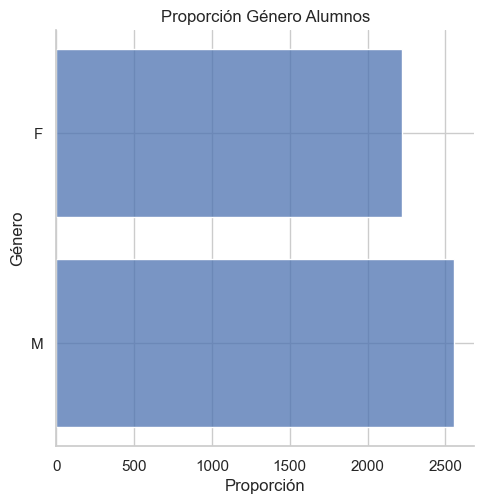

In [ ]:
sns.displot(data=df_alumnos,
            y = "genero",
            shrink = .8
            )
plt.title("Proporción Género Alumnos")
plt.ylabel("Género")
plt.xlabel("Proporción")
plt.show()

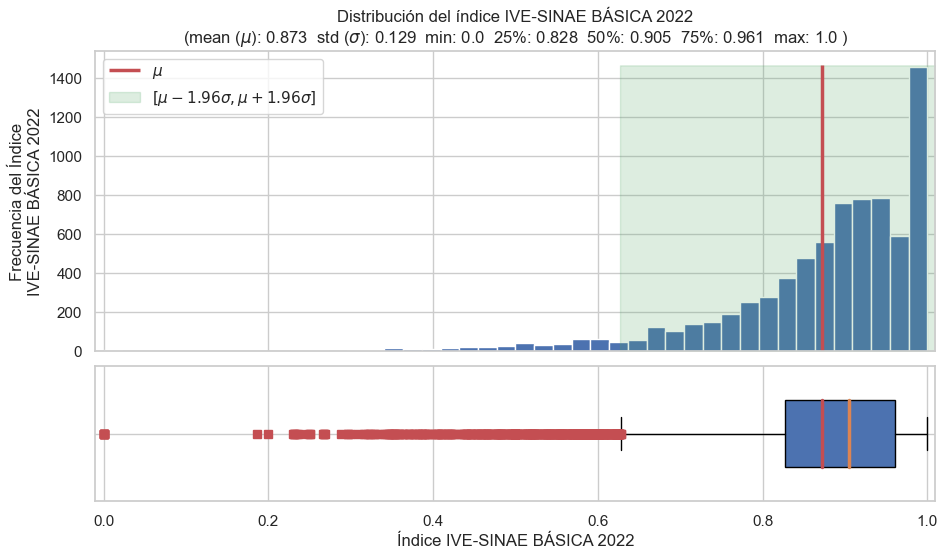

In [ ]:
fig, ax = plt.subplots(nrows=2,
                       figsize=(12,5),
                       sharex=True)
aux = df_ive["IVE-SINAE BÁSICA 2022"]
metadata = aux.describe()

prom = metadata["mean"]
des = metadata["std"]
mediana = metadata["50%"]


str_stats = []
for key,value in metadata[list(metadata.index[1:])].to_dict().items():
    if key == "mean":
        str_stats.append(f"{key} ($\mu$):")
    elif key == "std":
        str_stats.append(f"{key} ($\sigma$):")
    else:
        str_stats.append(f"{key}:")
    str_stats.append(f"{round(value,3)} ")

str_stats = " ".join(str_stats)

ax[0].set_title(f"Distribución del índice IVE-SINAE BÁSICA 2022\n({str_stats})")
ax[0].set_ylabel("Frecuencia del Índice\nIVE-SINAE BÁSICA 2022")
ax[0].set_position([0.2,0.4,0.7,0.6])
ax[0].set_xlim(left=-0.01,right=1.01)
ax[1].set_xlabel("Índice IVE-SINAE BÁSICA 2022")
ax[1].set_position([0.2,0.1,0.7,0.27])

w, b = np.histogram(aux,bins="scott")

top = max(w) +10

ax[0].hist(x=b[:-1],bins=b,weights=w)
ax[0].vlines(x=prom,
             ymin=0,
             ymax=top,
             color="r",
             label=f"$\mu$",
             linewidth=2.5)

ax[0].fill_betweenx(y=range(top+1),
                    x1=prom-1.9*des,
                    x2=prom+1.9*des,
                    color="g",
                    alpha=0.2,
                    label=f"$[\mu- 1.96\sigma, \mu + 1.96\sigma]$")


ax[0].legend(loc='upper left')

ax[1].boxplot(aux,
              vert=False,
              sym="rs",
              widths=0.5,
              patch_artist=True,
              medianprops= dict(linewidth=2.5),
              showmeans=True,
              meanline=True,
              meanprops= dict(linestyle="-",linewidth=2.5,color="r"),
              labels=[""])

plt.show()

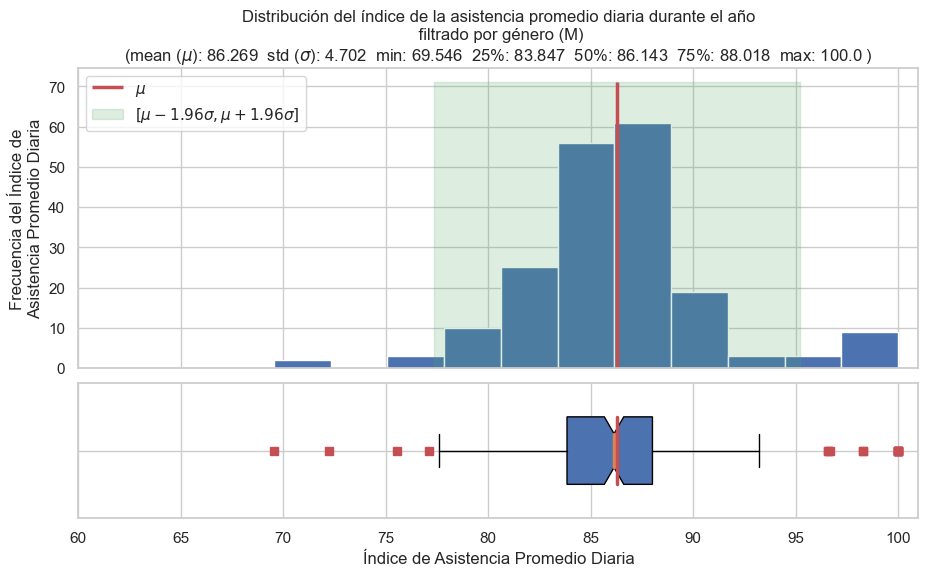

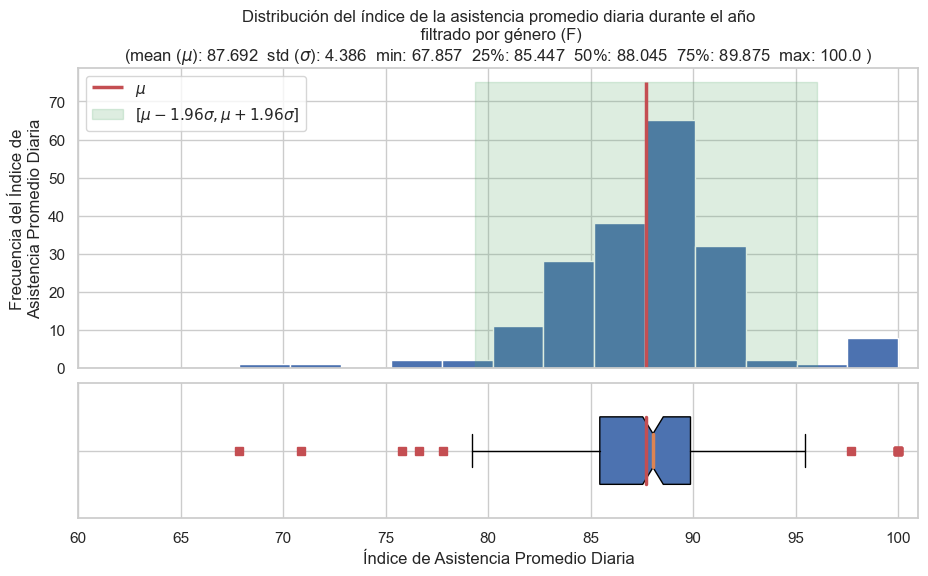

In [ ]:
for cat in ["M","F"]:

    fig, ax = plt.subplots(nrows=2,
                           figsize=(12,5),
                           sharex=True)

    aux = df[df>=0].merge(df_alumnos[df_alumnos["genero"]==cat][["usuario_id"]],on="usuario_id").drop(columns="usuario_id").describe().T
    aux = aux[aux["count"]>0]
    aux = aux["mean"]*100
    metadata = aux.describe()

    prom = metadata["mean"]
    des = metadata["std"]
    mediana = metadata["50%"]


    str_stats = []
    for key,value in metadata[list(metadata.index[1:])].to_dict().items():
        if key == "mean":
            str_stats.append(f"{key} ($\mu$):")
        elif key == "std":
            str_stats.append(f"{key} ($\sigma$):")
        else:
            str_stats.append(f"{key}:")
        str_stats.append(f"{round(value,3)} ")

    str_stats = " ".join(str_stats)

    ax[0].set_title(f"Distribución del índice de la asistencia promedio diaria durante el año\n filtrado por género ({cat})\n({str_stats})")
    ax[0].set_ylabel("Frecuencia del Índice de\nAsistencia Promedio Diaria")
    ax[0].set_position([0.2,0.4,0.7,0.6])
    ax[1].set_xlabel("Índice de Asistencia Promedio Diaria")
    ax[1].set_position([0.2,0.1,0.7,0.27])
    ax[0].set_xlim(left=60,right=101)

    w, b = np.histogram(aux,bins="scott")

    top = max(w) +10

    ax[0].hist(x=b[:-1],bins=b,weights=w)
    ax[0].vlines(x=prom,
                 ymin=0,
                 ymax=top,
                 color="r",
                 label=f"$\mu$",
                 linewidth=2.5)

    ax[0].fill_betweenx(y=range(top+1),
                        x1=prom-1.9*des,
                        x2=prom+1.9*des,
                        color="g",
                        alpha=0.2,
                        label=f"$[\mu- 1.96\sigma, \mu + 1.96\sigma]$")


    ax[0].legend(loc='upper left')

    ax[1].boxplot(aux,
                  notch=True,
                  vert=False,
                  sym="rs",
                  widths=0.5,
                  patch_artist=True,
                  medianprops= dict(linewidth=2.5),
                  showmeans=True,
                  meanline=True,
                  meanprops= dict(linestyle="-",linewidth=2.5,color="r"),
                  labels=[""])

    plt.show()

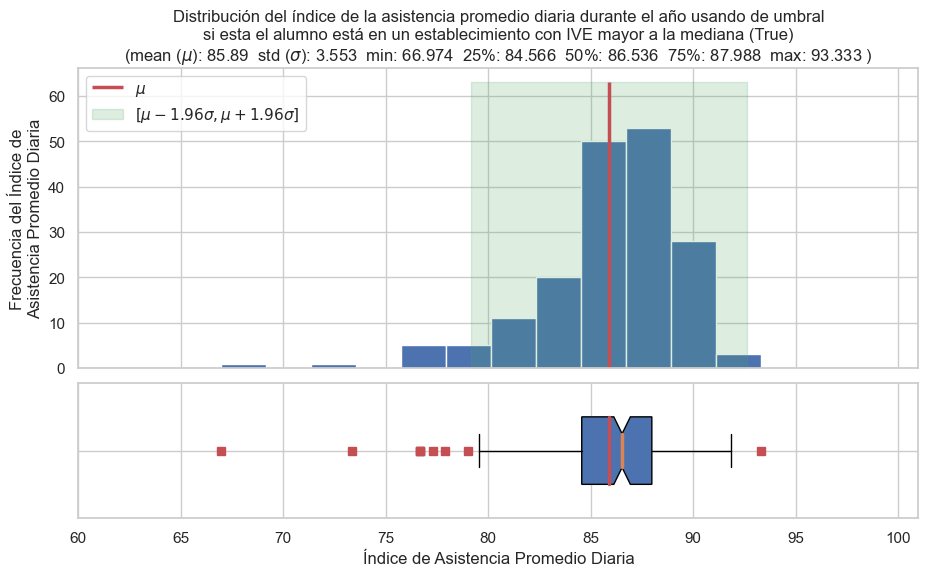

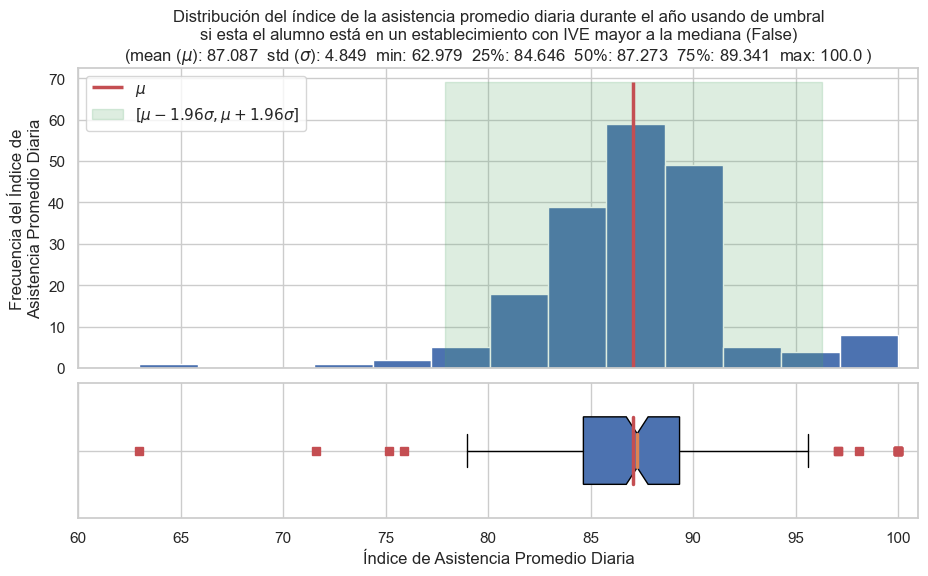

In [ ]:
median_ive = df_ive["IVE-SINAE BÁSICA 2022"].median()

for cat in [True,False]:

    fig, ax = plt.subplots(nrows=2,
                           figsize=(12,5),
                           sharex=True)

    
    aux = df[df>=0].merge(df_alumnos[["rbd","usuario_id"]],on="usuario_id")
    aux = aux.merge(right=df_ive[["IVE-SINAE BÁSICA 2022","ID_RBD"]],left_on="rbd",right_on="ID_RBD").assign(sobre_mediana=lambda x: x["IVE-SINAE BÁSICA 2022"]>=median_ive)
    aux = aux[aux["sobre_mediana"]==cat].drop(columns=["usuario_id","ID_RBD","rbd","IVE-SINAE BÁSICA 2022","sobre_mediana"]).describe().T
    aux = aux[aux["count"]>0]
    aux = aux["mean"]*100
    metadata = aux.describe()

    prom = metadata["mean"]
    des = metadata["std"]
    mediana = metadata["50%"]


    str_stats = []
    for key,value in metadata[list(metadata.index[1:])].to_dict().items():
        if key == "mean":
            str_stats.append(f"{key} ($\mu$):")
        elif key == "std":
            str_stats.append(f"{key} ($\sigma$):")
        else:
            str_stats.append(f"{key}:")
        str_stats.append(f"{round(value,3)} ")

    str_stats = " ".join(str_stats)

    ax[0].set_title(f"Distribución del índice de la asistencia promedio diaria durante el año usando de umbral\nsi esta el alumno está en un establecimiento con IVE mayor a la mediana ({cat})\n({str_stats})")
    ax[0].set_ylabel("Frecuencia del Índice de\nAsistencia Promedio Diaria")
    ax[0].set_position([0.2,0.4,0.7,0.6])
    ax[1].set_xlabel("Índice de Asistencia Promedio Diaria")
    ax[1].set_position([0.2,0.1,0.7,0.27])
    ax[0].set_xlim(left=60,right=101)

    w, b = np.histogram(aux,bins="scott")

    top = max(w) +10

    ax[0].hist(x=b[:-1],bins=b,weights=w)
    ax[0].vlines(x=prom,
                 ymin=0,
                 ymax=top,
                 color="r",
                 label=f"$\mu$",
                 linewidth=2.5)

    ax[0].fill_betweenx(y=range(top+1),
                        x1=prom-1.9*des,
                        x2=prom+1.9*des,
                        color="g",
                        alpha=0.2,
                        label=f"$[\mu- 1.96\sigma, \mu + 1.96\sigma]$")


    ax[0].legend(loc='upper left')

    ax[1].boxplot(aux,
                  notch=True,
                  vert=False,
                  sym="rs",
                  widths=0.5,
                  patch_artist=True,
                  medianprops= dict(linewidth=2.5),
                  showmeans=True,
                  meanline=True,
                  meanprops= dict(linestyle="-",linewidth=2.5,color="r"),
                  labels=[""])

    plt.show()

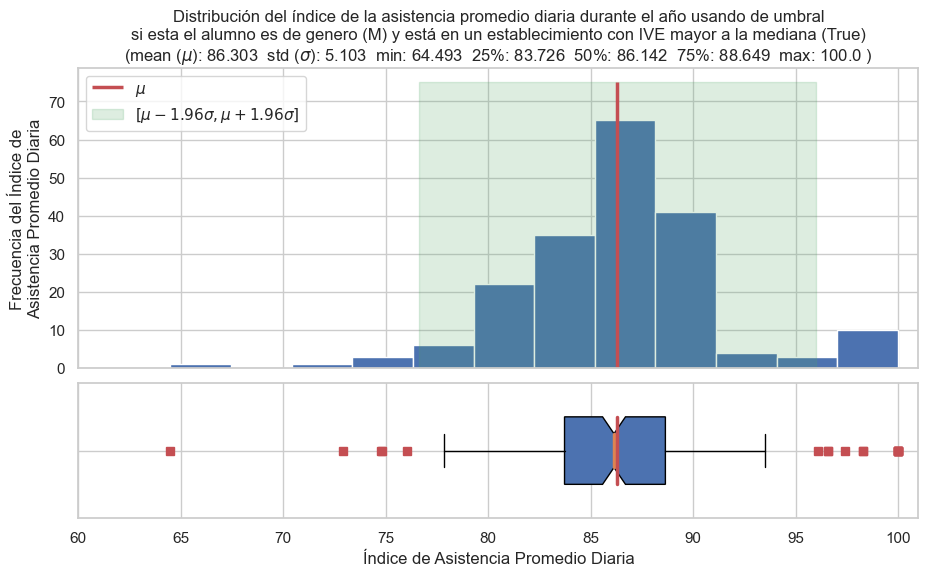

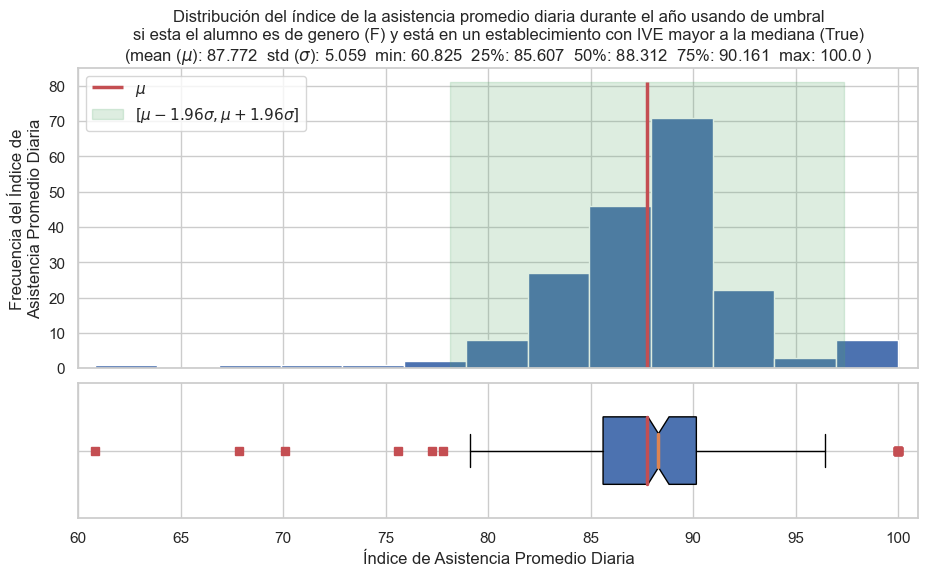

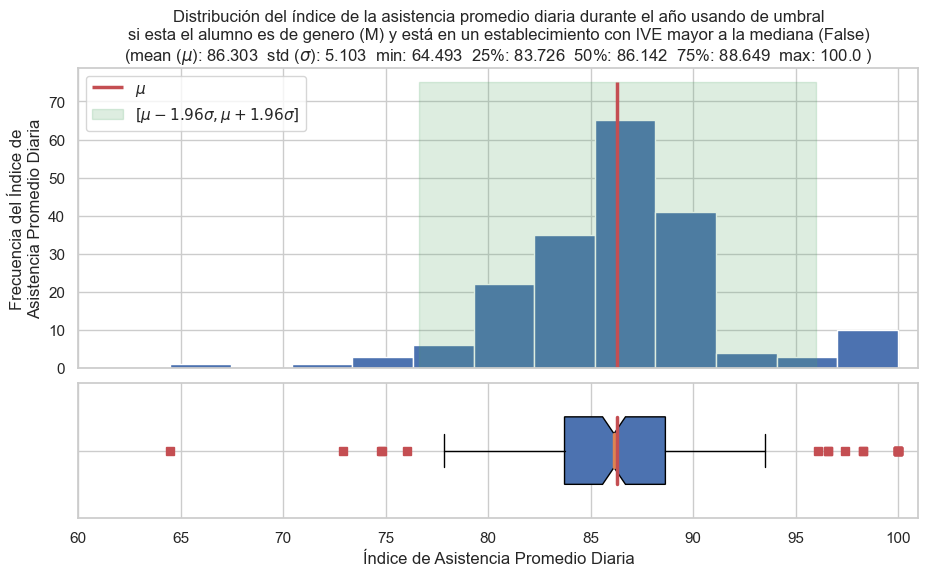

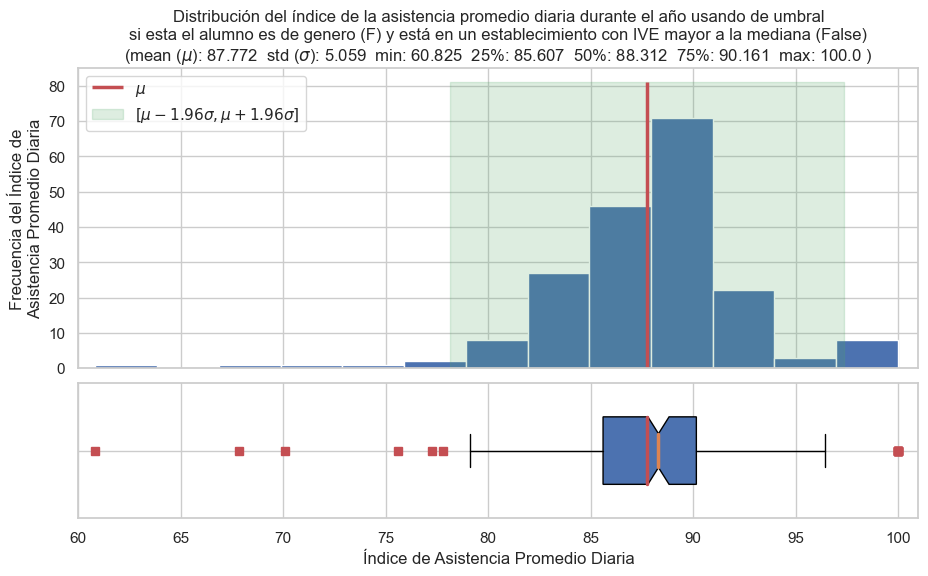

In [ ]:
median_ive = df_ive["IVE-SINAE BÁSICA 2022"].median()

for cat1 in [True,False]:
    
    for cat2 in ["M","F"]:

        fig, ax = plt.subplots(nrows=2,
                               figsize=(12,5),
                               sharex=True)


        aux = df[df>=0].merge(df_alumnos[df_alumnos["genero"]==cat2][["rbd","usuario_id"]],on="usuario_id")
        aux = aux.merge(right=df_ive[["IVE-SINAE BÁSICA 2022","ID_RBD"]],left_on="rbd",right_on="ID_RBD").assign(sobre_mediana=lambda x: x["IVE-SINAE BÁSICA 2022"]>=median_ive)
        aux = aux[aux["sobre_mediana"]==cat].drop(columns=["usuario_id","ID_RBD","rbd","IVE-SINAE BÁSICA 2022","sobre_mediana"]).describe().T
        aux = aux[aux["count"]>0]
        aux = aux["mean"]*100
        metadata = aux.describe()

        prom = metadata["mean"]
        des = metadata["std"]
        mediana = metadata["50%"]


        str_stats = []
        for key,value in metadata[list(metadata.index[1:])].to_dict().items():
            if key == "mean":
                str_stats.append(f"{key} ($\mu$):")
            elif key == "std":
                str_stats.append(f"{key} ($\sigma$):")
            else:
                str_stats.append(f"{key}:")
            str_stats.append(f"{round(value,3)} ")

        str_stats = " ".join(str_stats)

        ax[0].set_title(f"Distribución del índice de la asistencia promedio diaria durante el año usando de umbral\nsi esta el alumno es de genero ({cat2}) y está en un establecimiento con IVE mayor a la mediana ({cat1})\n({str_stats})")
        ax[0].set_ylabel("Frecuencia del Índice de\nAsistencia Promedio Diaria")
        ax[0].set_position([0.2,0.4,0.7,0.6])
        ax[1].set_xlabel("Índice de Asistencia Promedio Diaria")
        ax[1].set_position([0.2,0.1,0.7,0.27])
        ax[0].set_xlim(left=60,right=101)

        w, b = np.histogram(aux,bins="scott")

        top = max(w) +10

        ax[0].hist(x=b[:-1],bins=b,weights=w)
        ax[0].vlines(x=prom,
                     ymin=0,
                     ymax=top,
                     color="r",
                     label=f"$\mu$",
                     linewidth=2.5)

        ax[0].fill_betweenx(y=range(top+1),
                            x1=prom-1.9*des,
                            x2=prom+1.9*des,
                            color="g",
                            alpha=0.2,
                            label=f"$[\mu- 1.96\sigma, \mu + 1.96\sigma]$")


        ax[0].legend(loc='upper left')

        ax[1].boxplot(aux,
                      notch=True,
                      vert=False,
                      sym="rs",
                      widths=0.5,
                      patch_artist=True,
                      medianprops= dict(linewidth=2.5),
                      showmeans=True,
                      meanline=True,
                      meanprops= dict(linestyle="-",linewidth=2.5,color="r"),
                      labels=[""])

        plt.show()

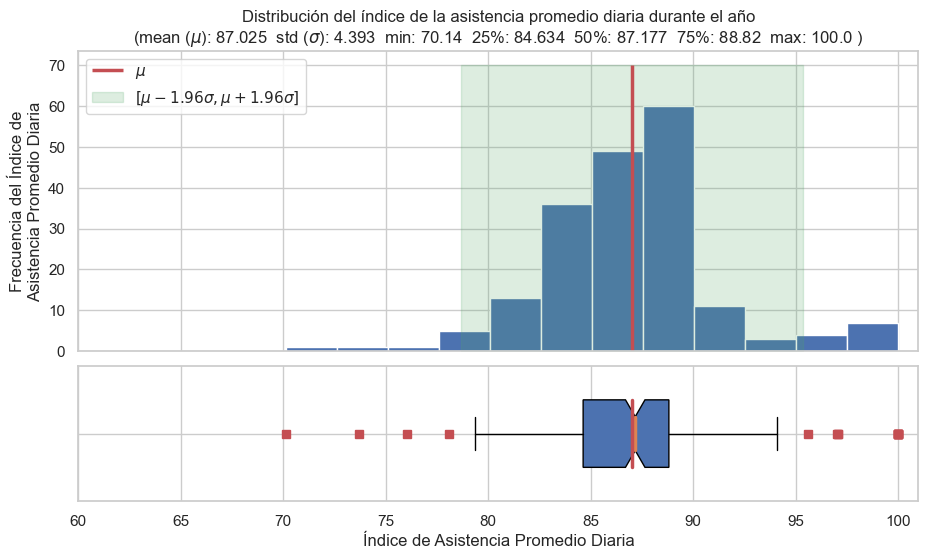

In [ ]:

fig, ax = plt.subplots(nrows=2,
                       figsize=(12,5),
                       sharex=True)
aux = df[df>=0].describe().T
aux = aux[aux["count"]>0]
aux = aux["mean"]*100
metadata = aux.describe()

prom = metadata["mean"]
des = metadata["std"]
mediana = metadata["50%"]


str_stats = []
for key,value in metadata[list(metadata.index[1:])].to_dict().items():
    if key == "mean":
        str_stats.append(f"{key} ($\mu$):")
    elif key == "std":
        str_stats.append(f"{key} ($\sigma$):")
    else:
        str_stats.append(f"{key}:")
    str_stats.append(f"{round(value,3)} ")

str_stats = " ".join(str_stats)

ax[0].set_title(f"Distribución del índice de la asistencia promedio diaria durante el año\n({str_stats})")
ax[0].set_ylabel("Frecuencia del Índice de\nAsistencia Promedio Diaria")
ax[0].set_position([0.2,0.4,0.7,0.6])
ax[0].set_xlim(left=60,right=101)
ax[1].set_xlabel("Índice de Asistencia Promedio Diaria")
ax[1].set_position([0.2,0.1,0.7,0.27])

w, b = np.histogram(aux,bins="scott")

top = max(w) +10

ax[0].hist(x=b[:-1],bins=b,weights=w)
ax[0].vlines(x=prom,
             ymin=0,
             ymax=top,
             color="r",
             label=f"$\mu$",
             linewidth=2.5)

ax[0].fill_betweenx(y=range(top+1),
                    x1=prom-1.9*des,
                    x2=prom+1.9*des,
                    color="g",
                    alpha=0.2,
                    label=f"$[\mu- 1.96\sigma, \mu + 1.96\sigma]$")


ax[0].legend(loc='upper left')

ax[1].boxplot(aux,
              notch=True,
              vert=False,
              sym="rs",
              widths=0.5,
              patch_artist=True,
              medianprops= dict(linewidth=2.5),
              showmeans=True,
              meanline=True,
              meanprops= dict(linestyle="-",linewidth=2.5,color="r"),
              labels=[""])

plt.show()

### Graficos de Series de Tiempo

## Gráficos Personalizados

In [ ]:
def extract_dias_no_trabajados(df:pd.DataFrame)->list:
    extract = []
    for fecha in df.iloc:
        aux = fecha.values[fecha.values>=-1]
        if -1 in aux:
            if len(set(aux.tolist())) == 1:
                extract.append(2)
            else:
                extract.append(1)
        else:
            extract.append(0)
    return np.array(extract)      

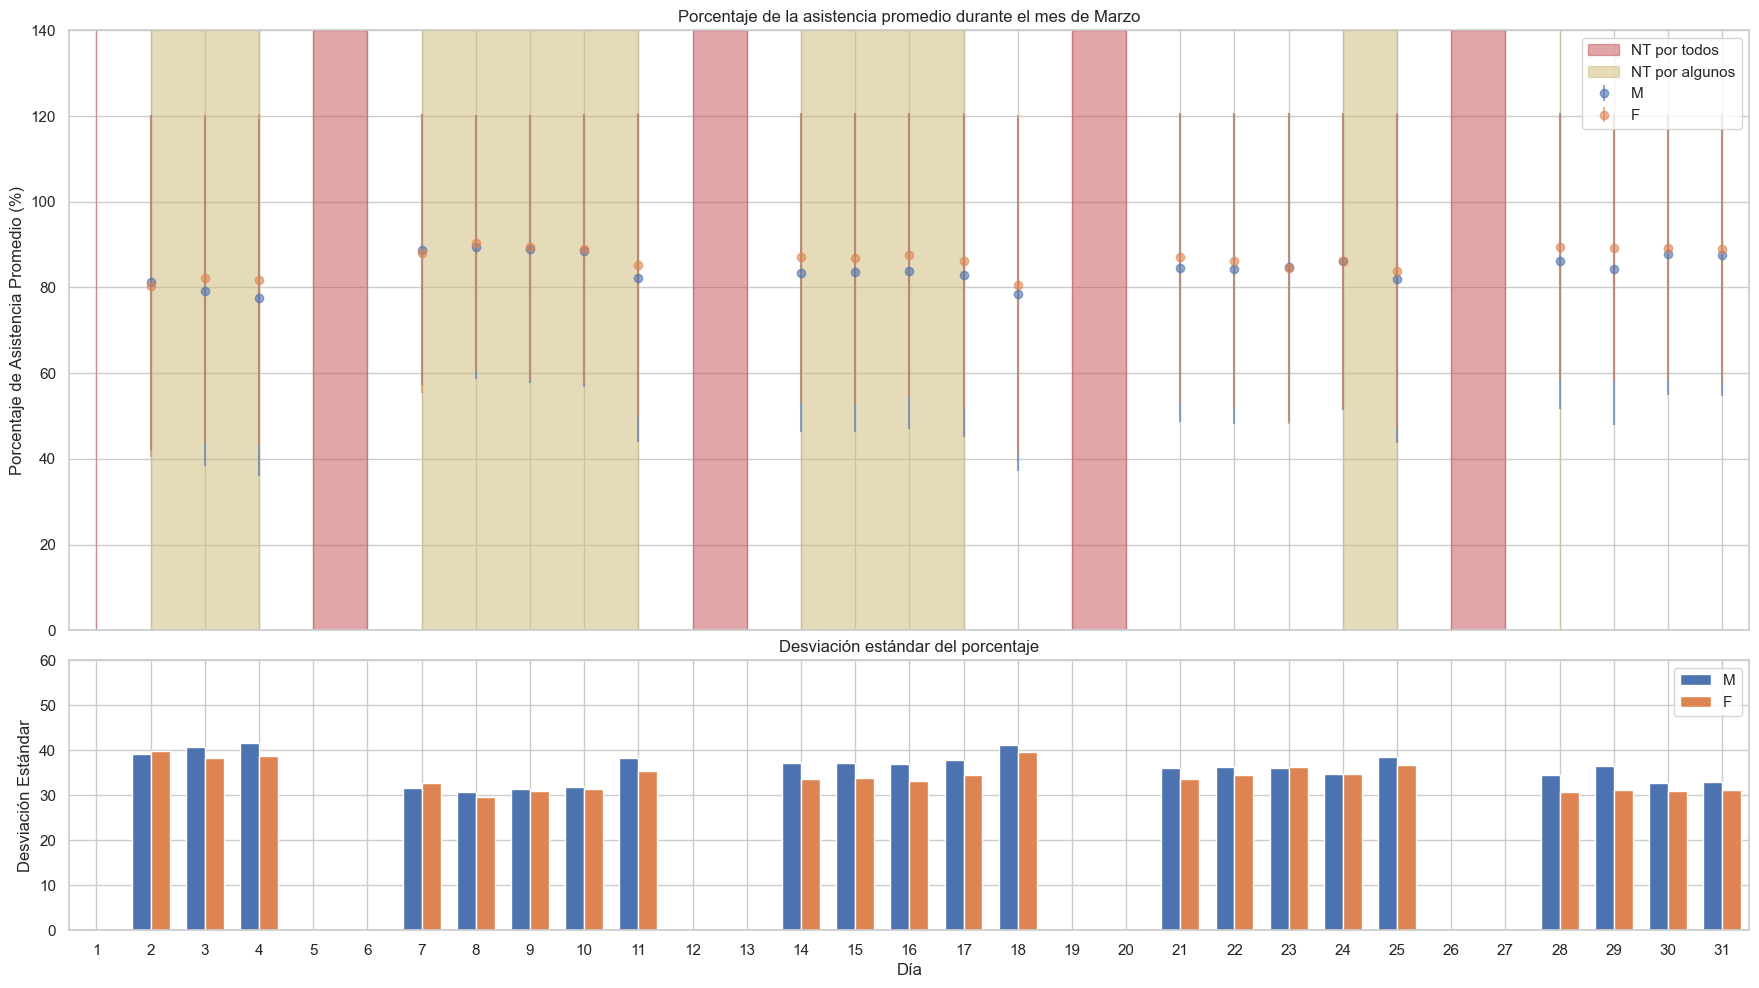

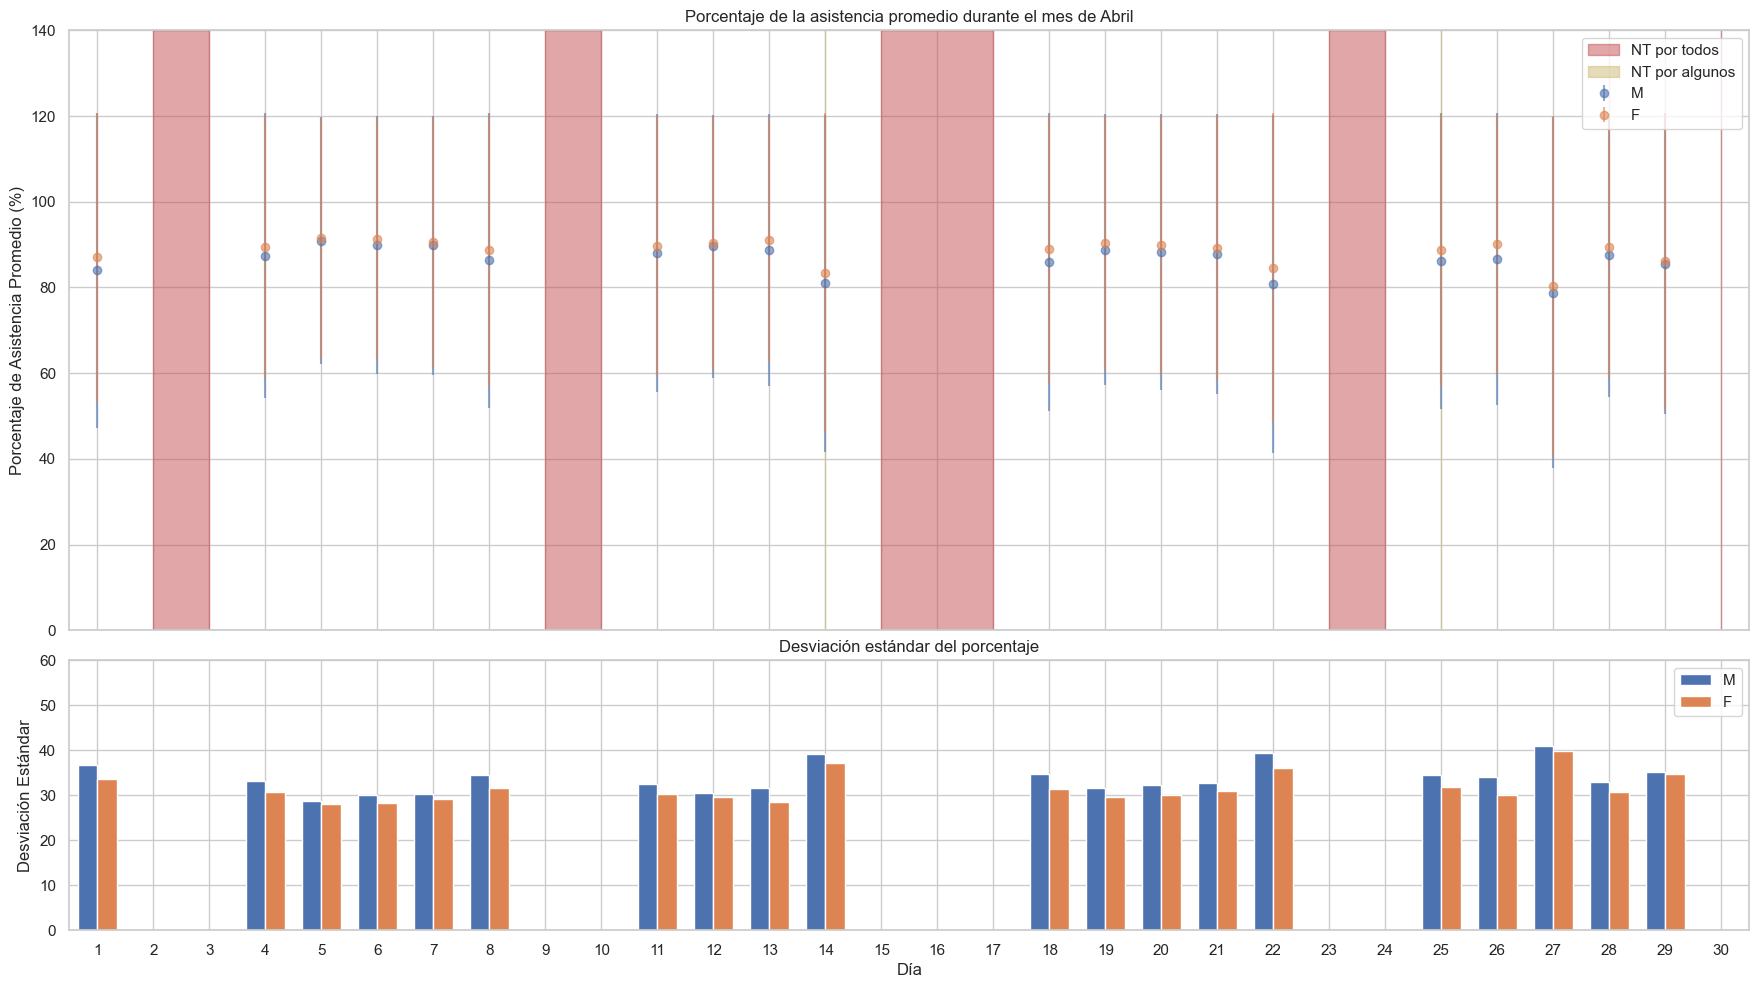

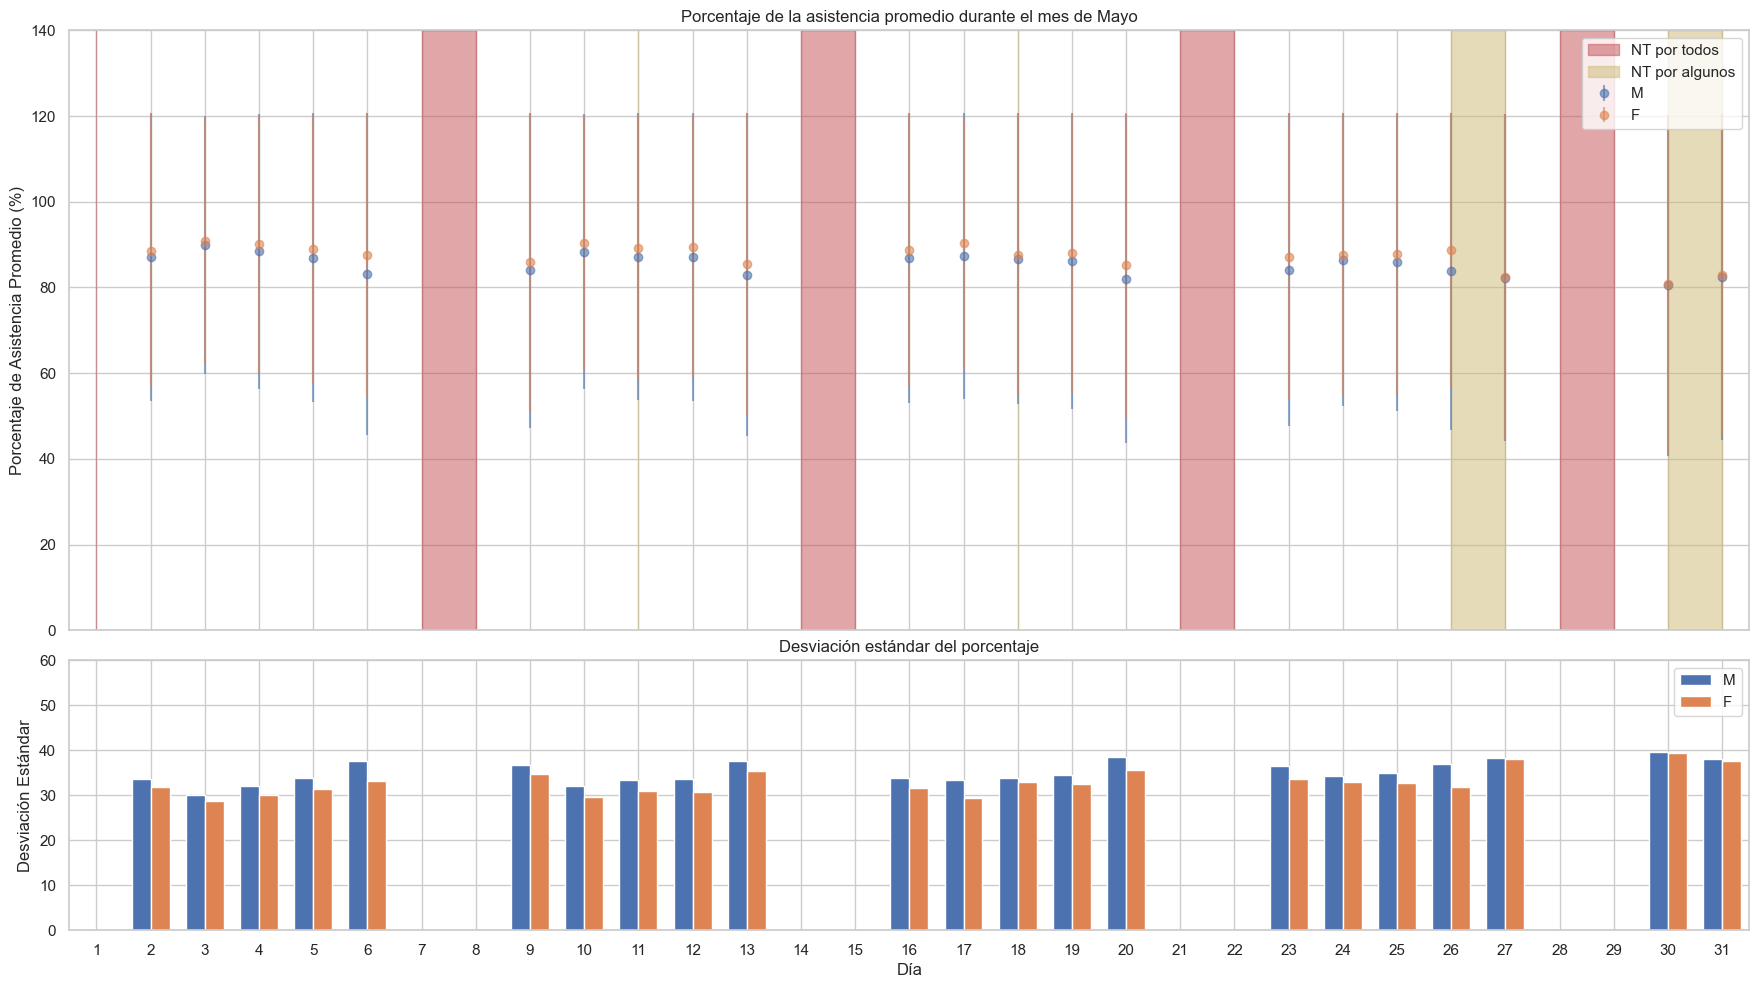

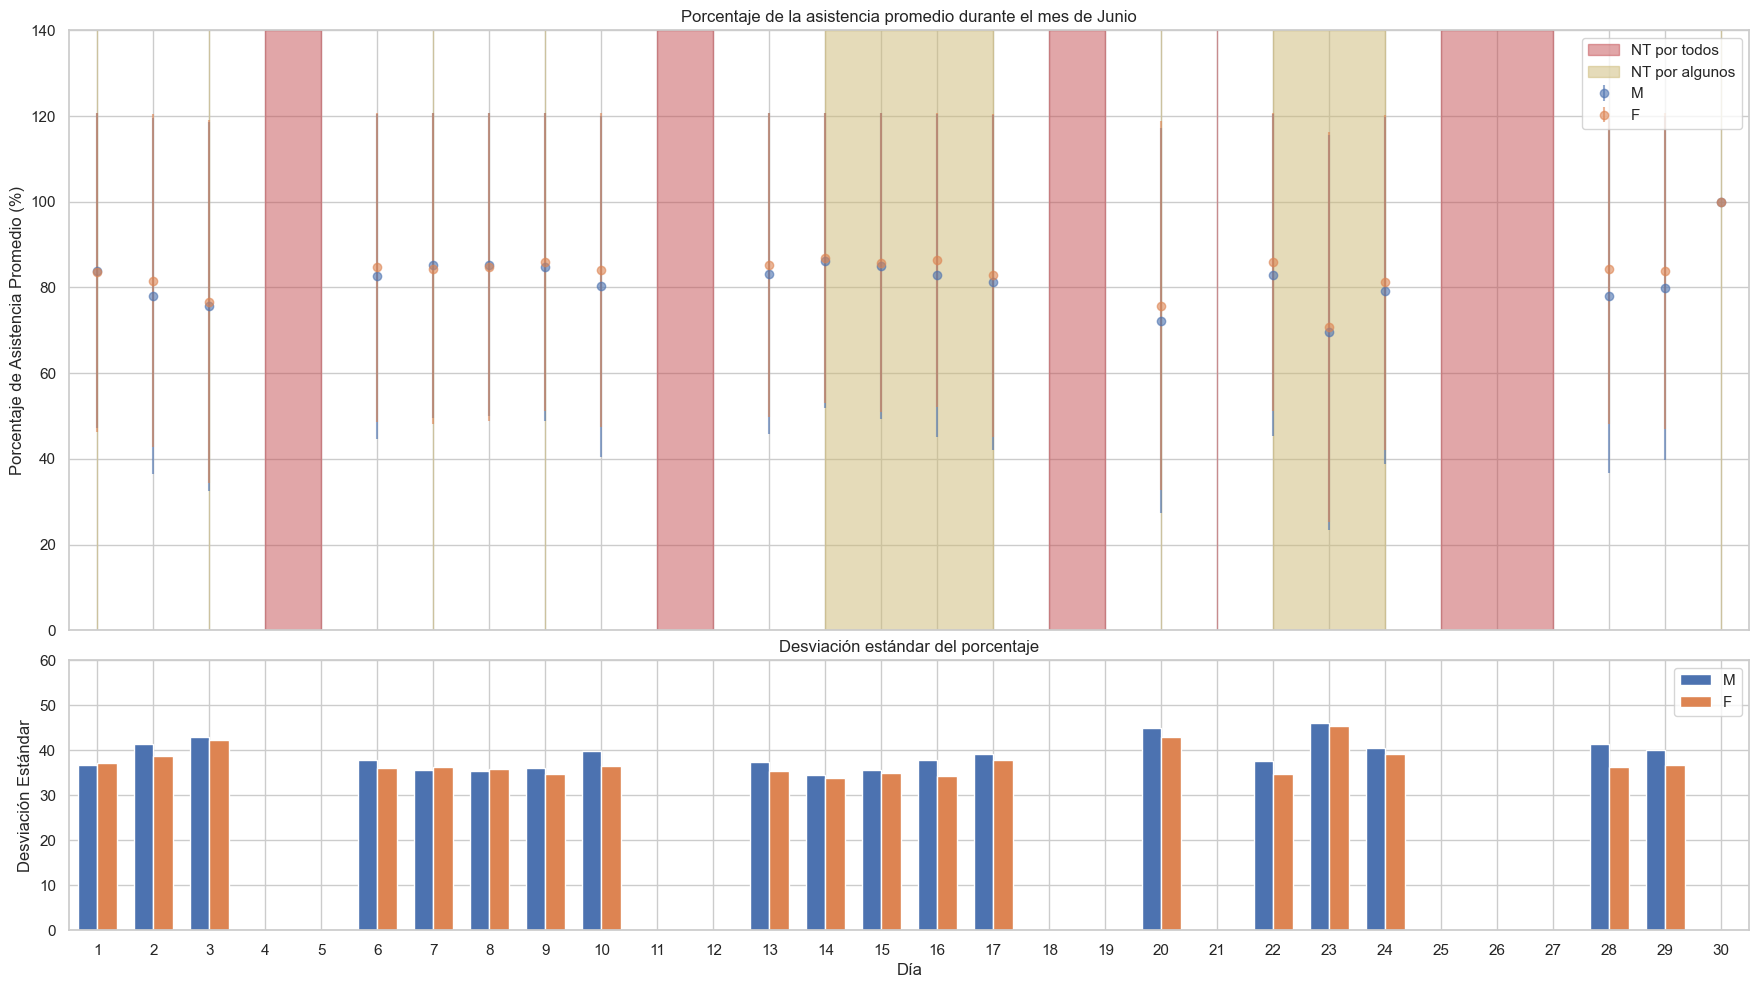

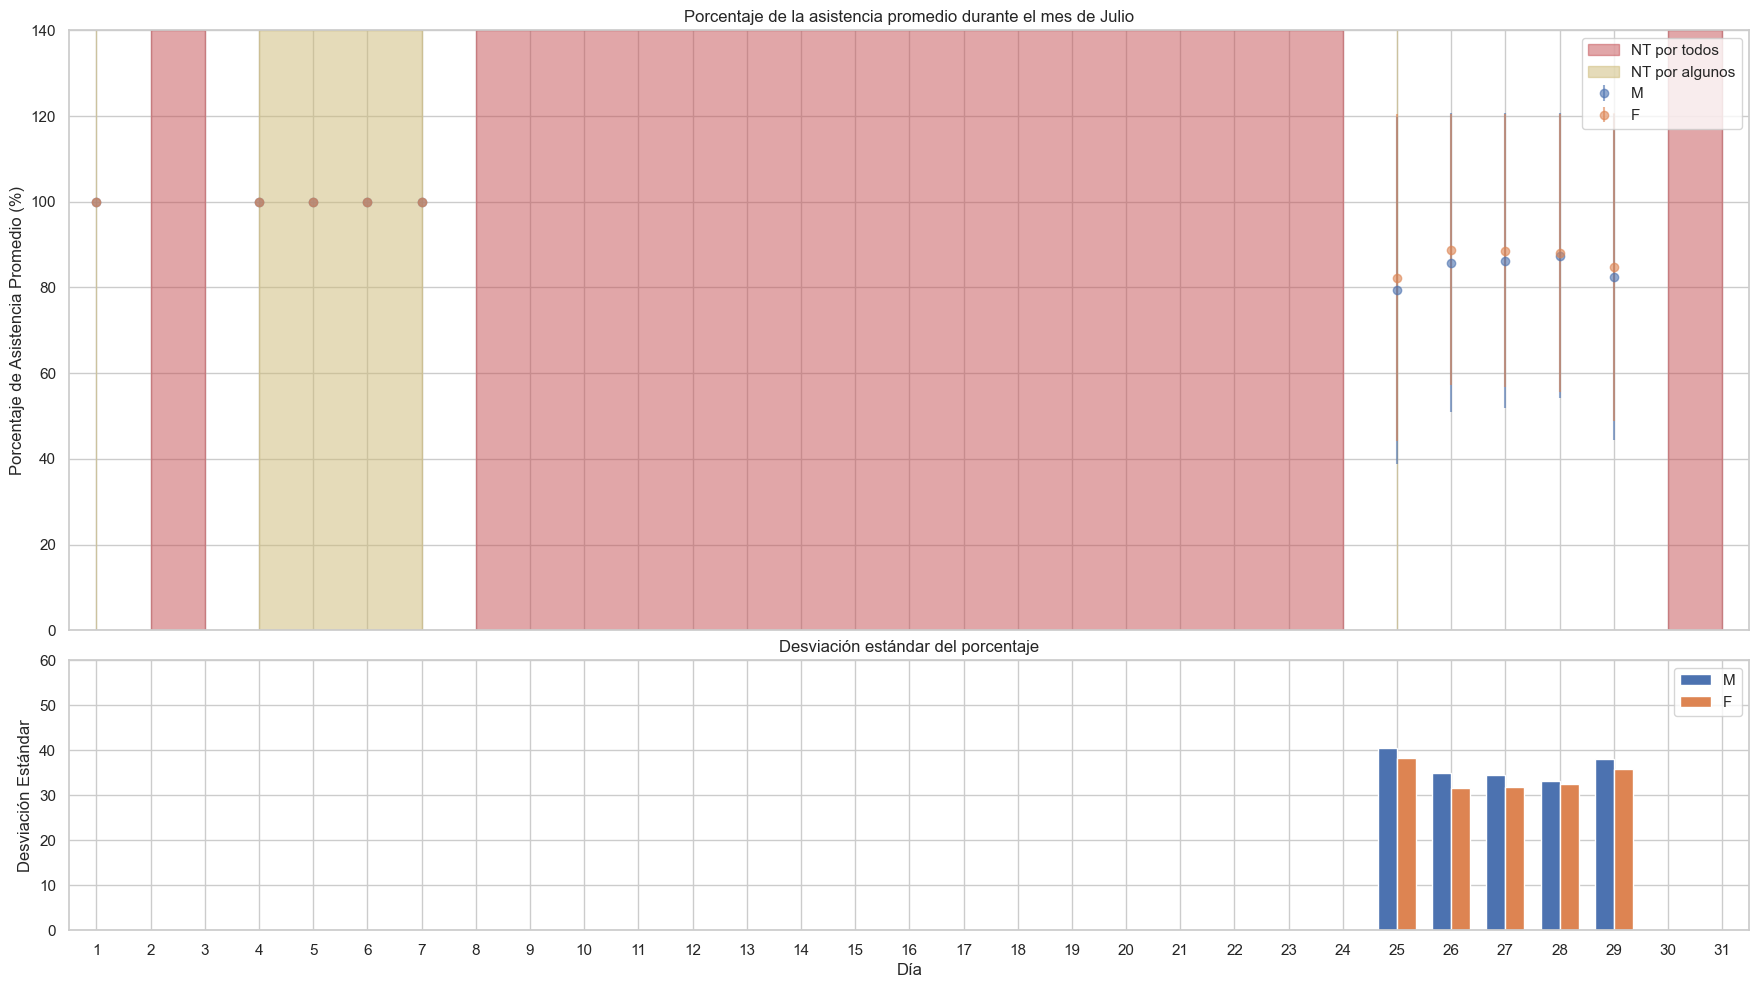

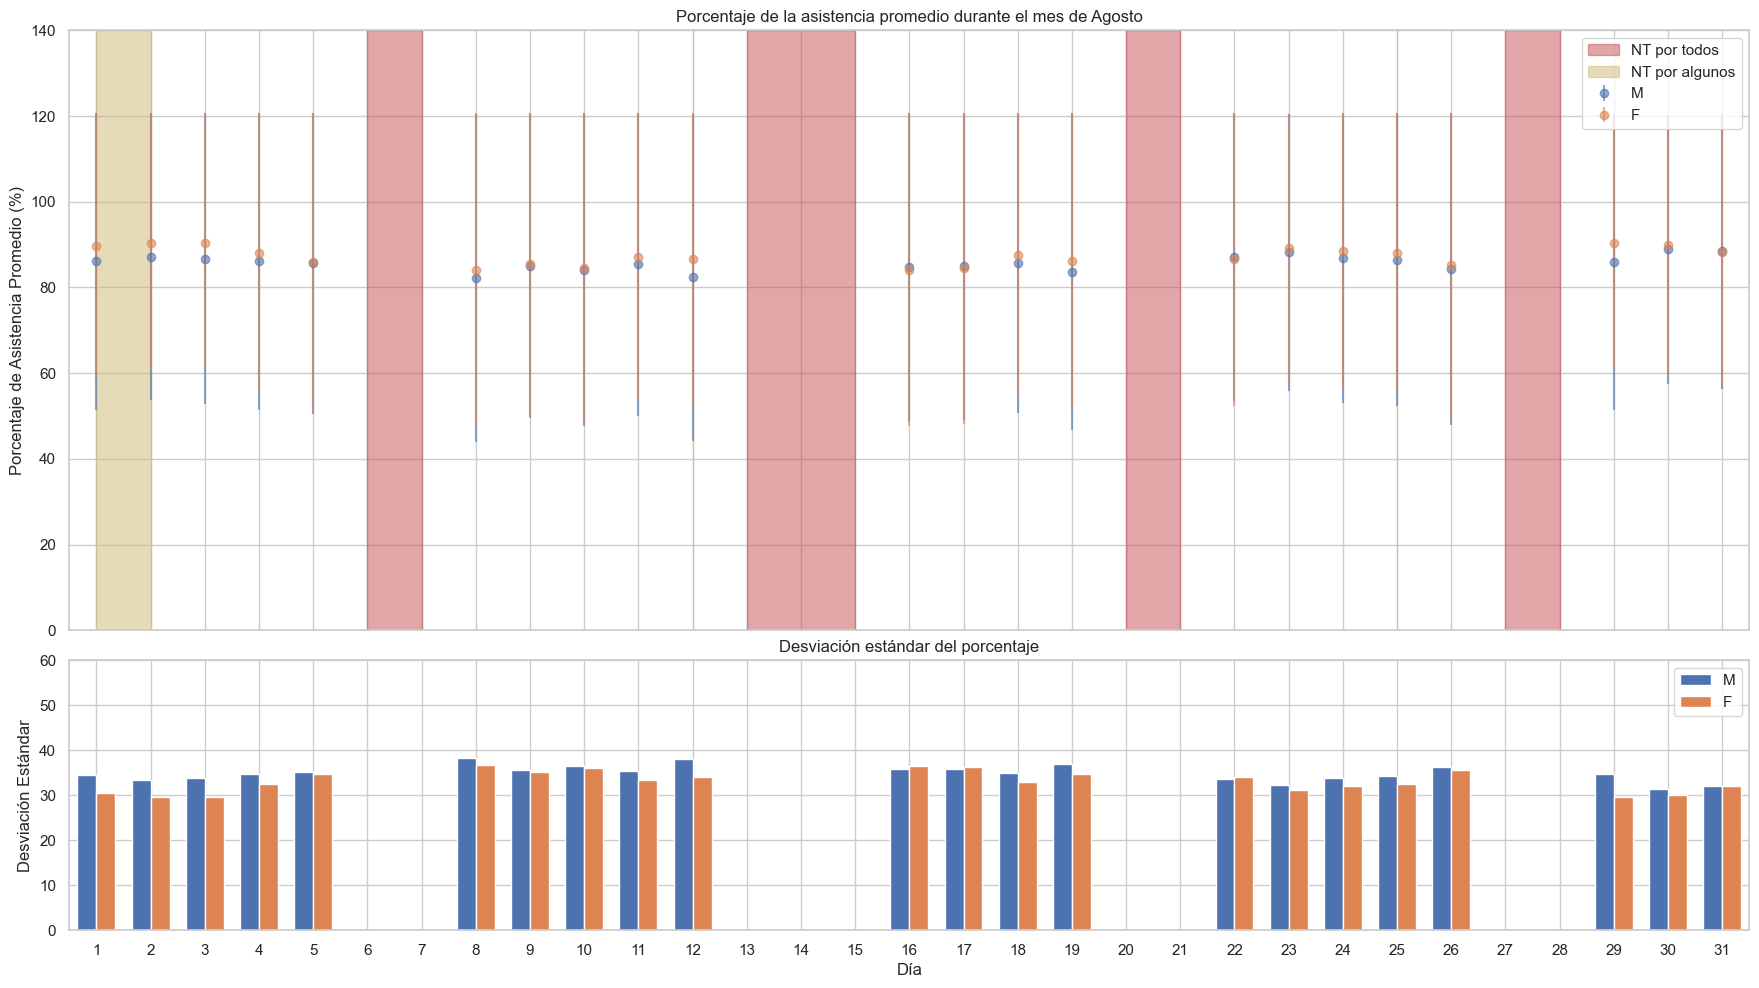

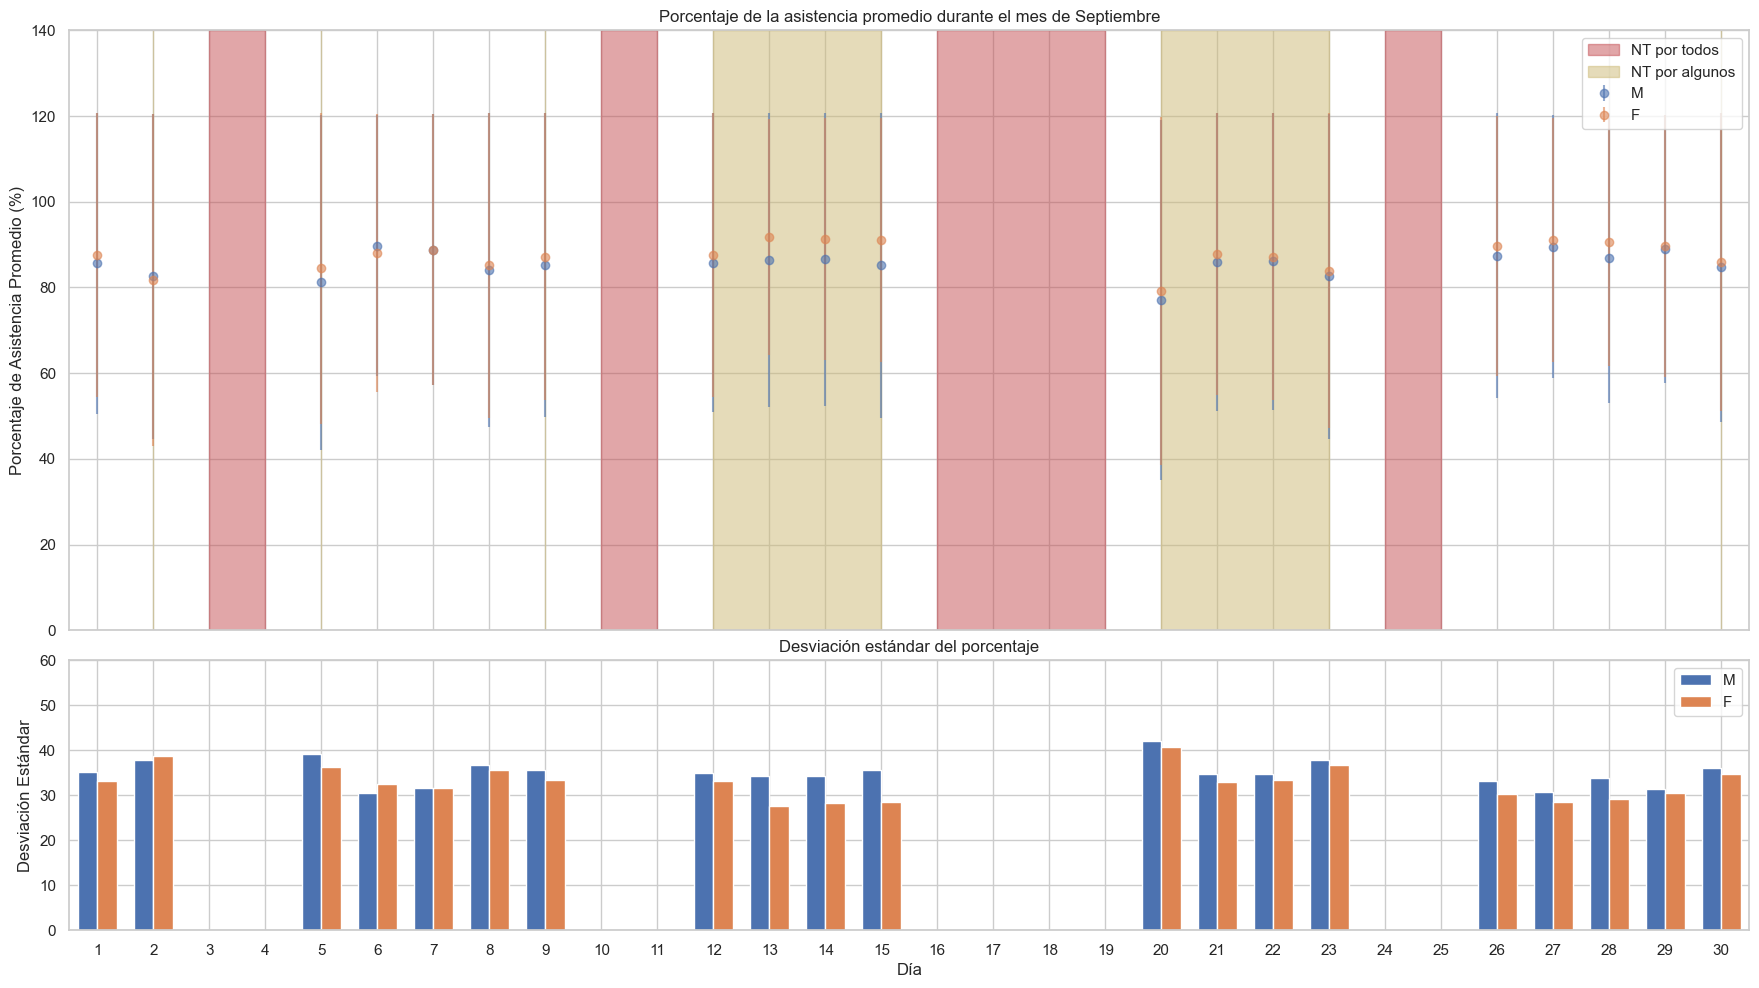

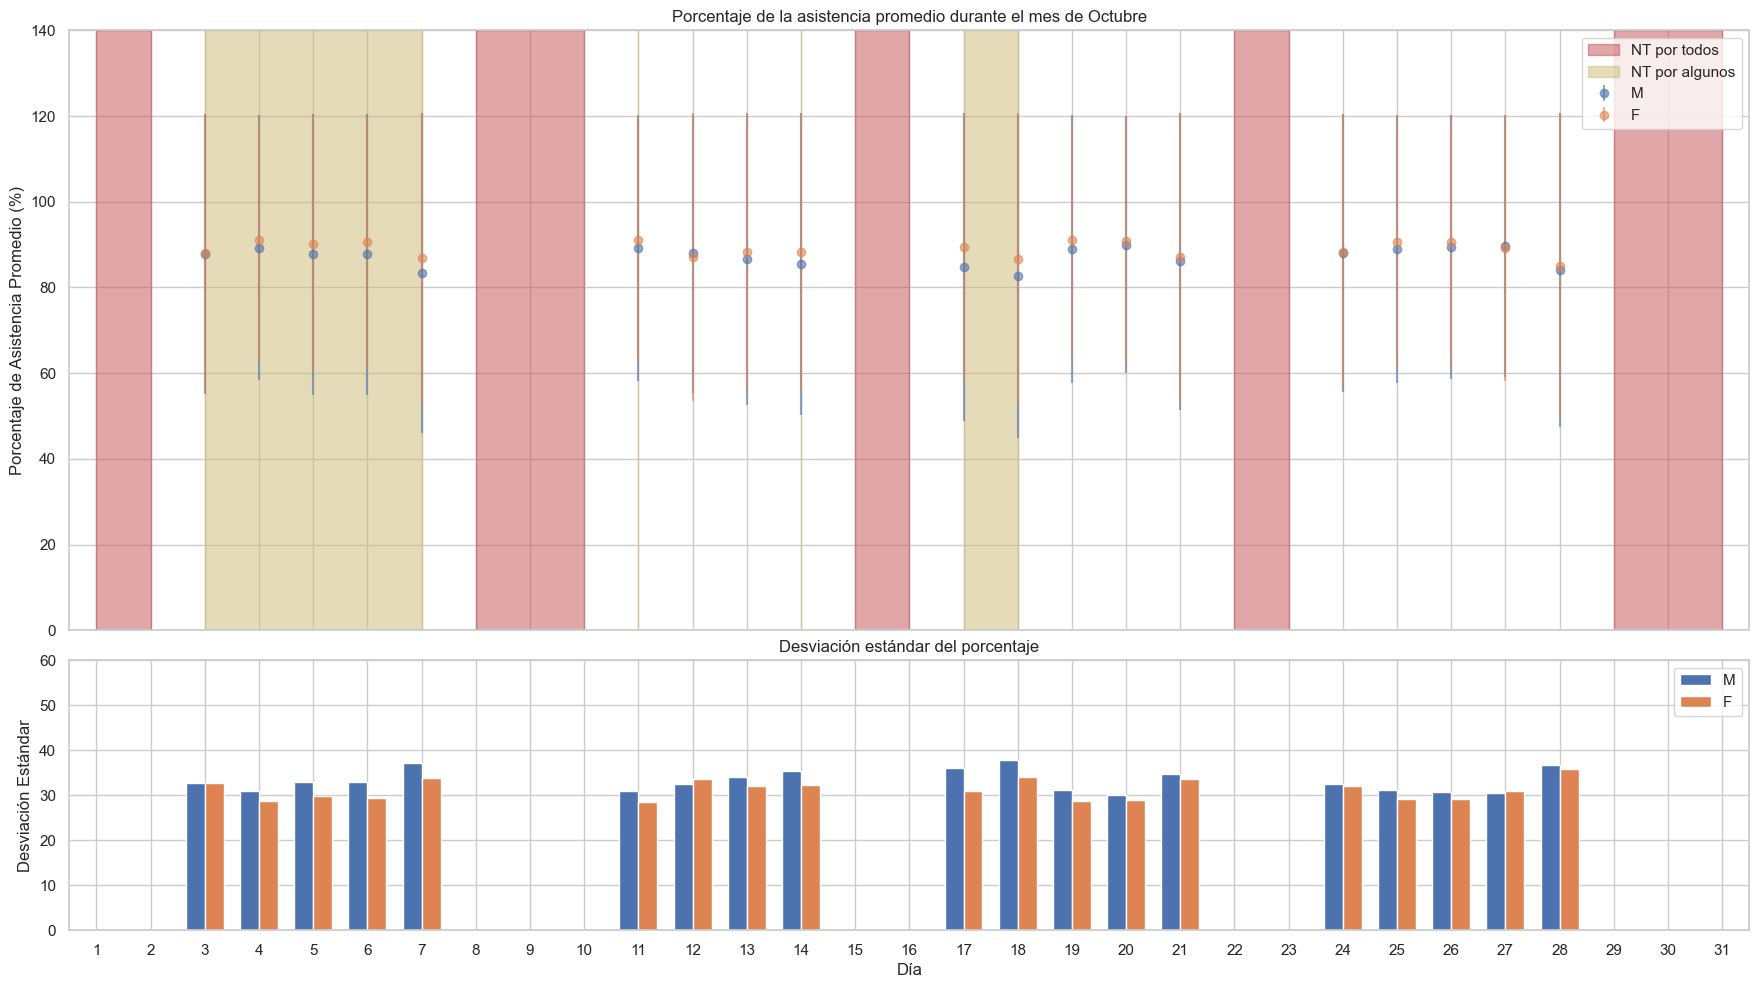

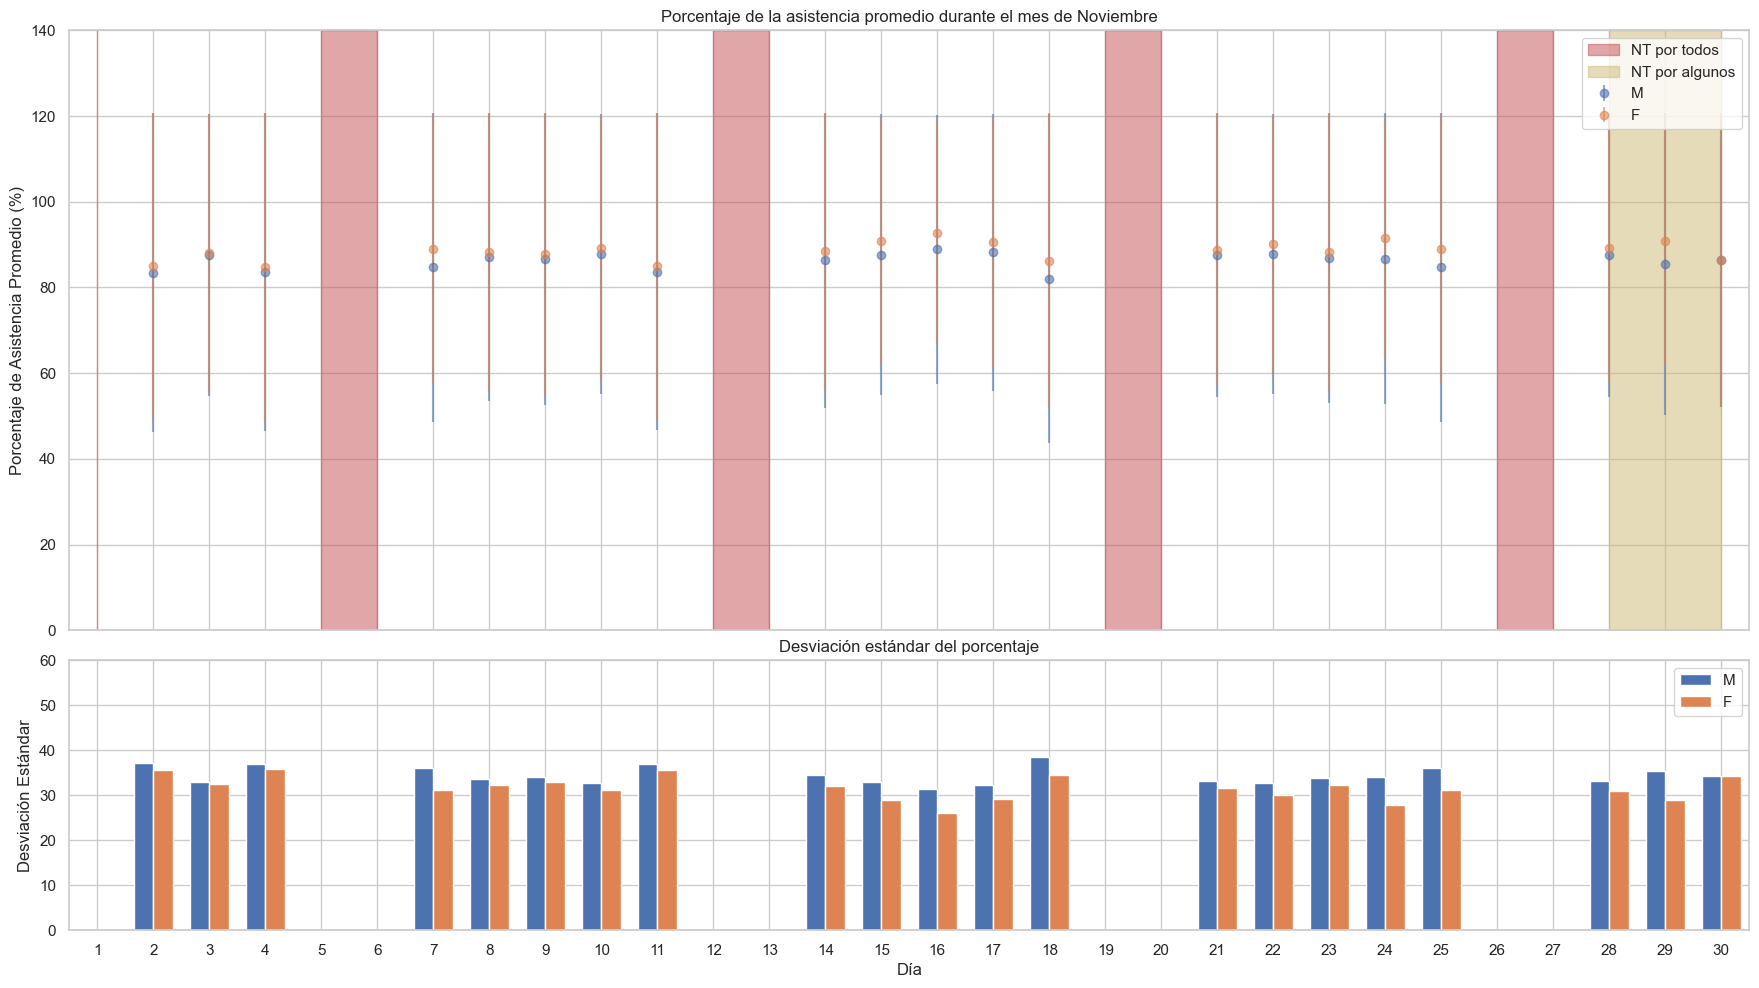

In [ ]:
top =140

## Need
for i in range(3,12):
        x_plot = df.columns[df.columns.map(lambda x: x.month==i)]
        where_filter = extract_dias_no_trabajados(df[x_plot].T)

        fig, ax = plt.subplots(nrows=2,
                               figsize=(24,10),
                               sharex=True)


        ## Settings data
        ax[0].fill_between(x=x_plot,
                        y1=top,
                        where=where_filter==2,
                        color="r",
                        alpha=0.5,
                        label="NT por todos")

        ax[0].fill_between(x=x_plot,
                        y1=top,
                        where=where_filter==1,
                        color="y",
                        alpha=0.5,
                        label="NT por algunos")


        ax[0].set_xlim(left=datetime.datetime(2022, i, 1)- 12*datetime.timedelta(seconds=3600),right=datetime.datetime(2022, i, PARSE_STR_MONTH_TO_DATA[PARSE_INT_TO_MONTH[i-1]][1]) + 12*datetime.timedelta(seconds=3600))
        ax[0].set_ylim(bottom=0, top=top)
        ax[0].set_title(f"Porcentaje de la asistencia promedio durante el mes de {PARSE_INT_TO_MONTH[i-1]}")
        ax[0].set_ylabel("Porcentaje de Asistencia Promedio (%)")
        ax[0].set_position([0.2,0.4,0.7,0.6])
        ax[0].set_xticks(ticks=x_plot,labels=range(1,PARSE_STR_MONTH_TO_DATA[PARSE_INT_TO_MONTH[i-1]][1]+1), minor=False)


        ax[1].set_title(f"Desviación estándar del porcentaje")
        ax[1].set_ylabel("Desviación Estándar")
        ax[1].set_xlabel("Día")
        ax[1].set_ylim(bottom=0, top=60)
        ax[1].set_position([0.2,0.1,0.7,0.27])



        for j, cat in enumerate(["M","F"]):
            df_aux = df.merge(right=df_alumnos[df_alumnos["genero"]==cat],on="usuario_id")[list(x_plot)]
            stats_for_dates = df_aux[df_aux>=0].describe().T[(df_aux[df_aux>=0].describe().T)["count"]>0]
            y_std = stats_for_dates["std"]
            y_mean = stats_for_dates["mean"]

            ax[0].errorbar(x=stats_for_dates.index,
                    y=100*y_mean,
                    yerr=100*y_std,
                    fmt="o",
                    alpha=.6,
                    label = cat)

            ax[1].bar(x=stats_for_dates.index+(2*j-1)*datetime.timedelta(seconds=4.2*3600),
                  height=100*y_std,
                  width=0.35,
                  label=cat)

        ax[0].legend(loc='upper right')
        ax[1].legend(loc='upper right')
        ## Plot

        plt.show()

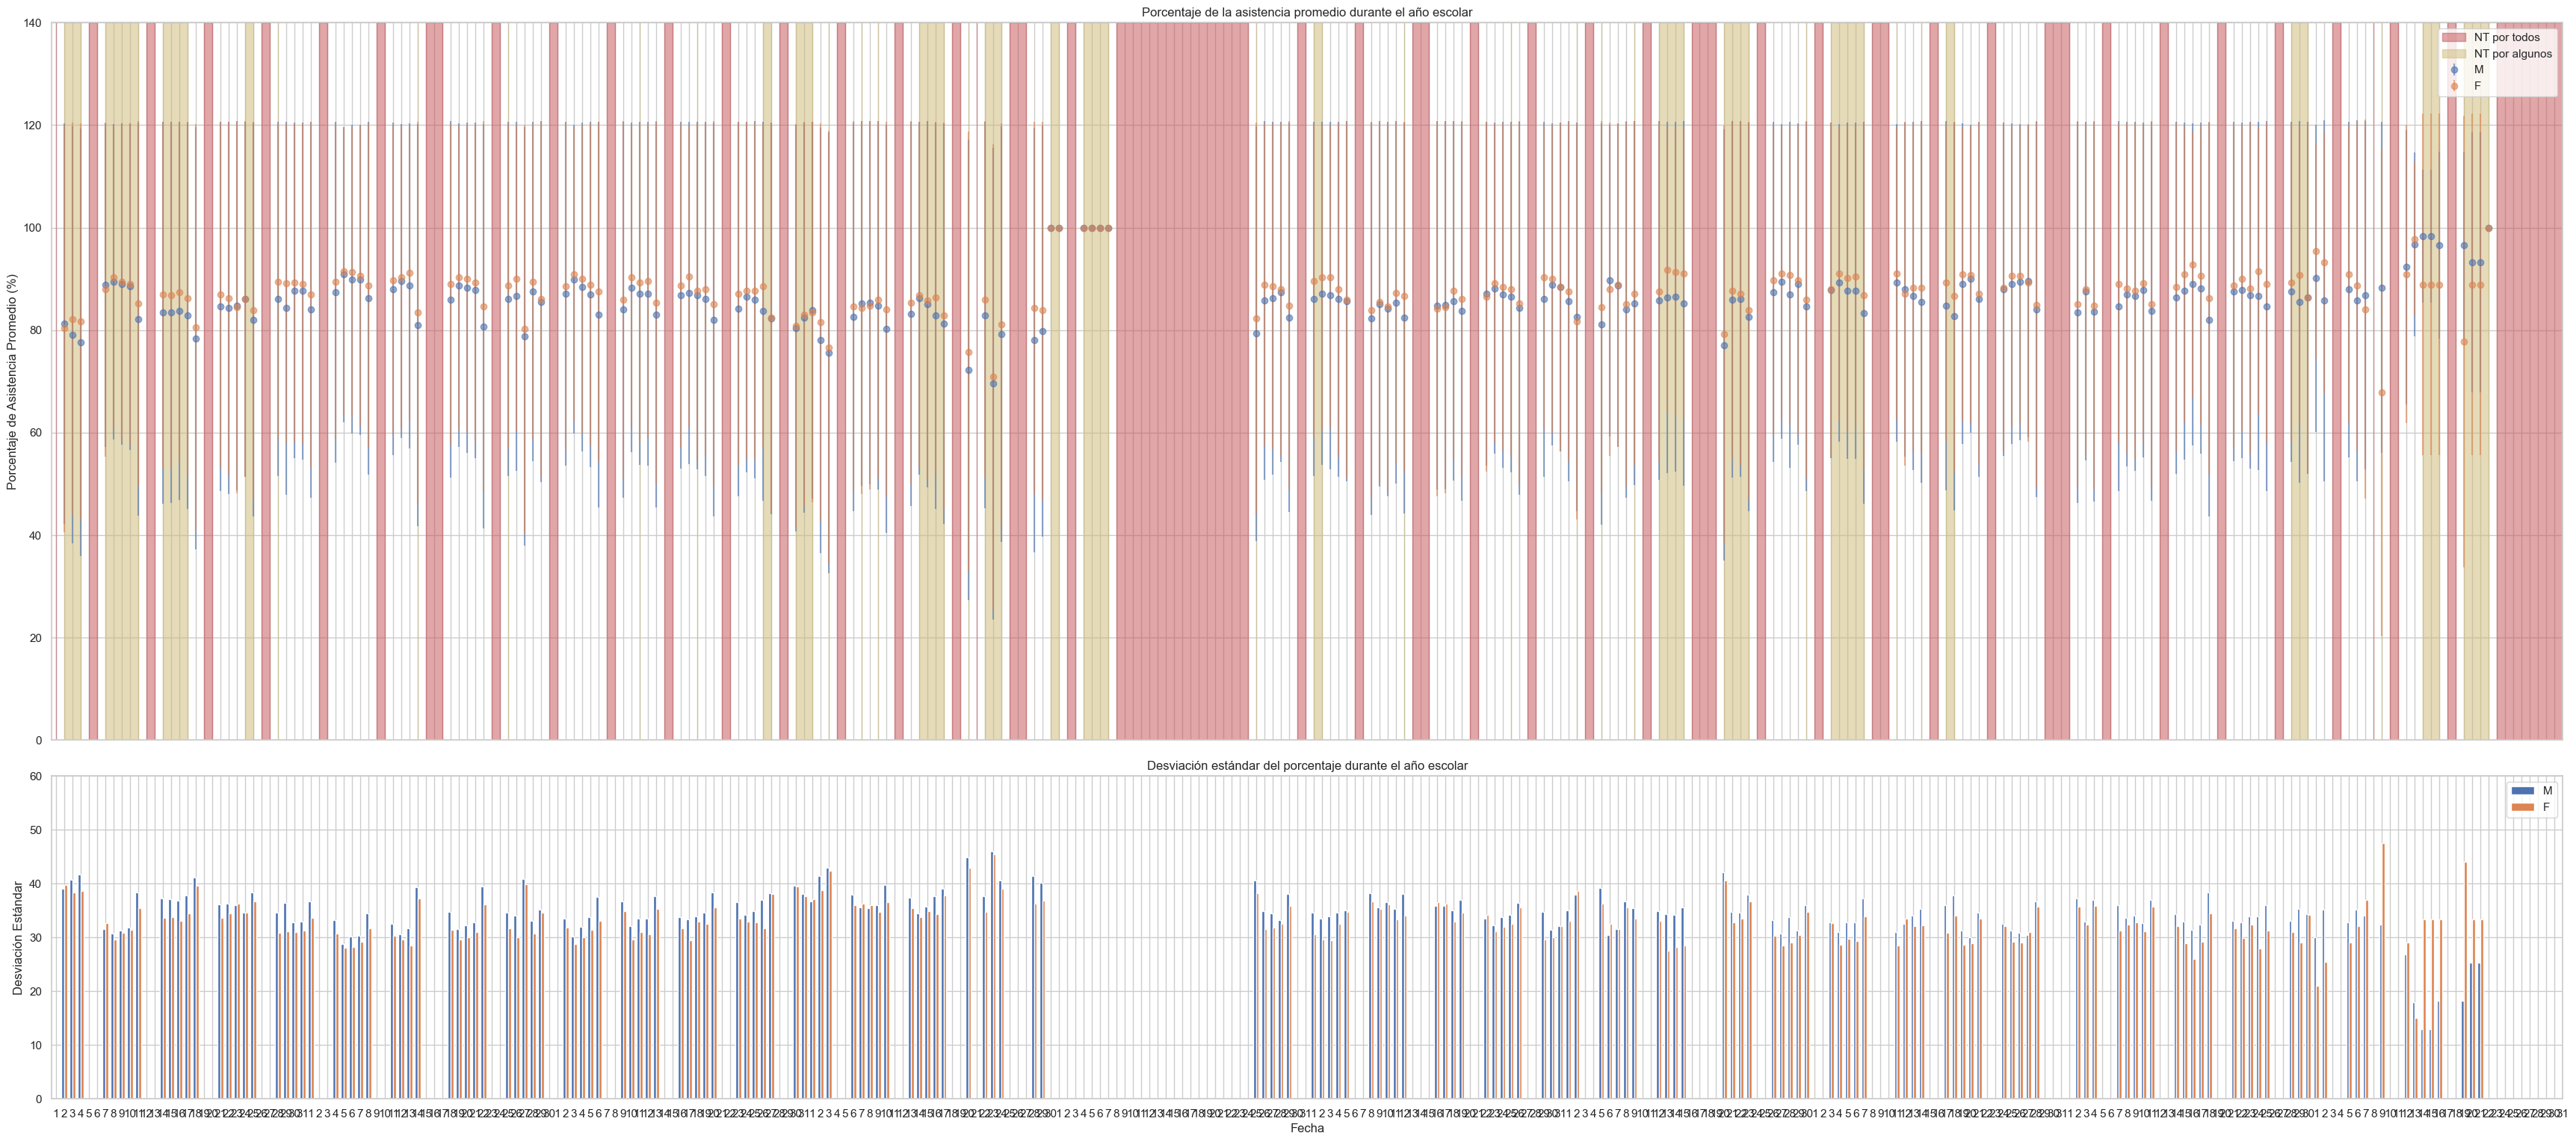

In [ ]:
top =140
## Need
x_plot = df.columns
where_filter = extract_dias_no_trabajados(df[x_plot].T)
fig, ax = plt.subplots(nrows=2,
                       figsize=(48,16),
                       sharex=True)
## Settings data
ax[0].fill_between(x=x_plot,
                y1=top,
                where=where_filter==2,
                color="r",
                alpha=0.5,
                label="NT por todos")
ax[0].fill_between(x=x_plot,
                y1=top,
                where=where_filter==1,
                color="y",
                alpha=0.5,
                label="NT por algunos")
ax[0].set_xlim(left=datetime.datetime(2022, 3, 1)- 12*datetime.timedelta(seconds=3600),right=datetime.datetime(2022, 11, 30) + 12*datetime.timedelta(seconds=3600))
ax[0].set_ylim(bottom=0, top=top)
ax[0].set_title(f"Porcentaje de la asistencia promedio durante el año escolar")
ax[0].set_ylabel("Porcentaje de Asistencia Promedio (%)")
ax[0].set_position([0.2,0.4,0.7,0.6])
ax[0].set_xticks(ticks=x_plot,labels=list(map(lambda x: x.day,list(pd.date_range(datetime.datetime(2022,3,1),datetime.datetime(2022,12,31))))), minor=False)
ax[1].set_title(f"Desviación estándar del porcentaje durante el año escolar")
ax[1].set_ylabel("Desviación Estándar")
ax[1].set_xlabel("Fecha")
ax[1].set_ylim(bottom=0, top=60)
ax[1].set_position([0.2,0.1,0.7,0.27])
for j, cat in enumerate(["M","F"]):
    df_aux = df.merge(right=df_alumnos[df_alumnos["genero"]==cat],on="usuario_id")[list(x_plot)]
    stats_for_dates = df_aux[df_aux>=0].describe().T[(df_aux[df_aux>=0].describe().T)["count"]>0]
    y_std = stats_for_dates["std"]
    y_mean = stats_for_dates["mean"]
    ax[0].errorbar(x=stats_for_dates.index,
            y=100*y_mean,
            yerr=100*y_std,
            fmt="o",
            alpha=.6,
            label = cat)
    ax[1].bar(x=stats_for_dates.index+(2*j-1)*datetime.timedelta(seconds=4.2*3600),
          height=y_std*100,
          width=0.35,
          label=cat)
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
## Plot
plt.show()

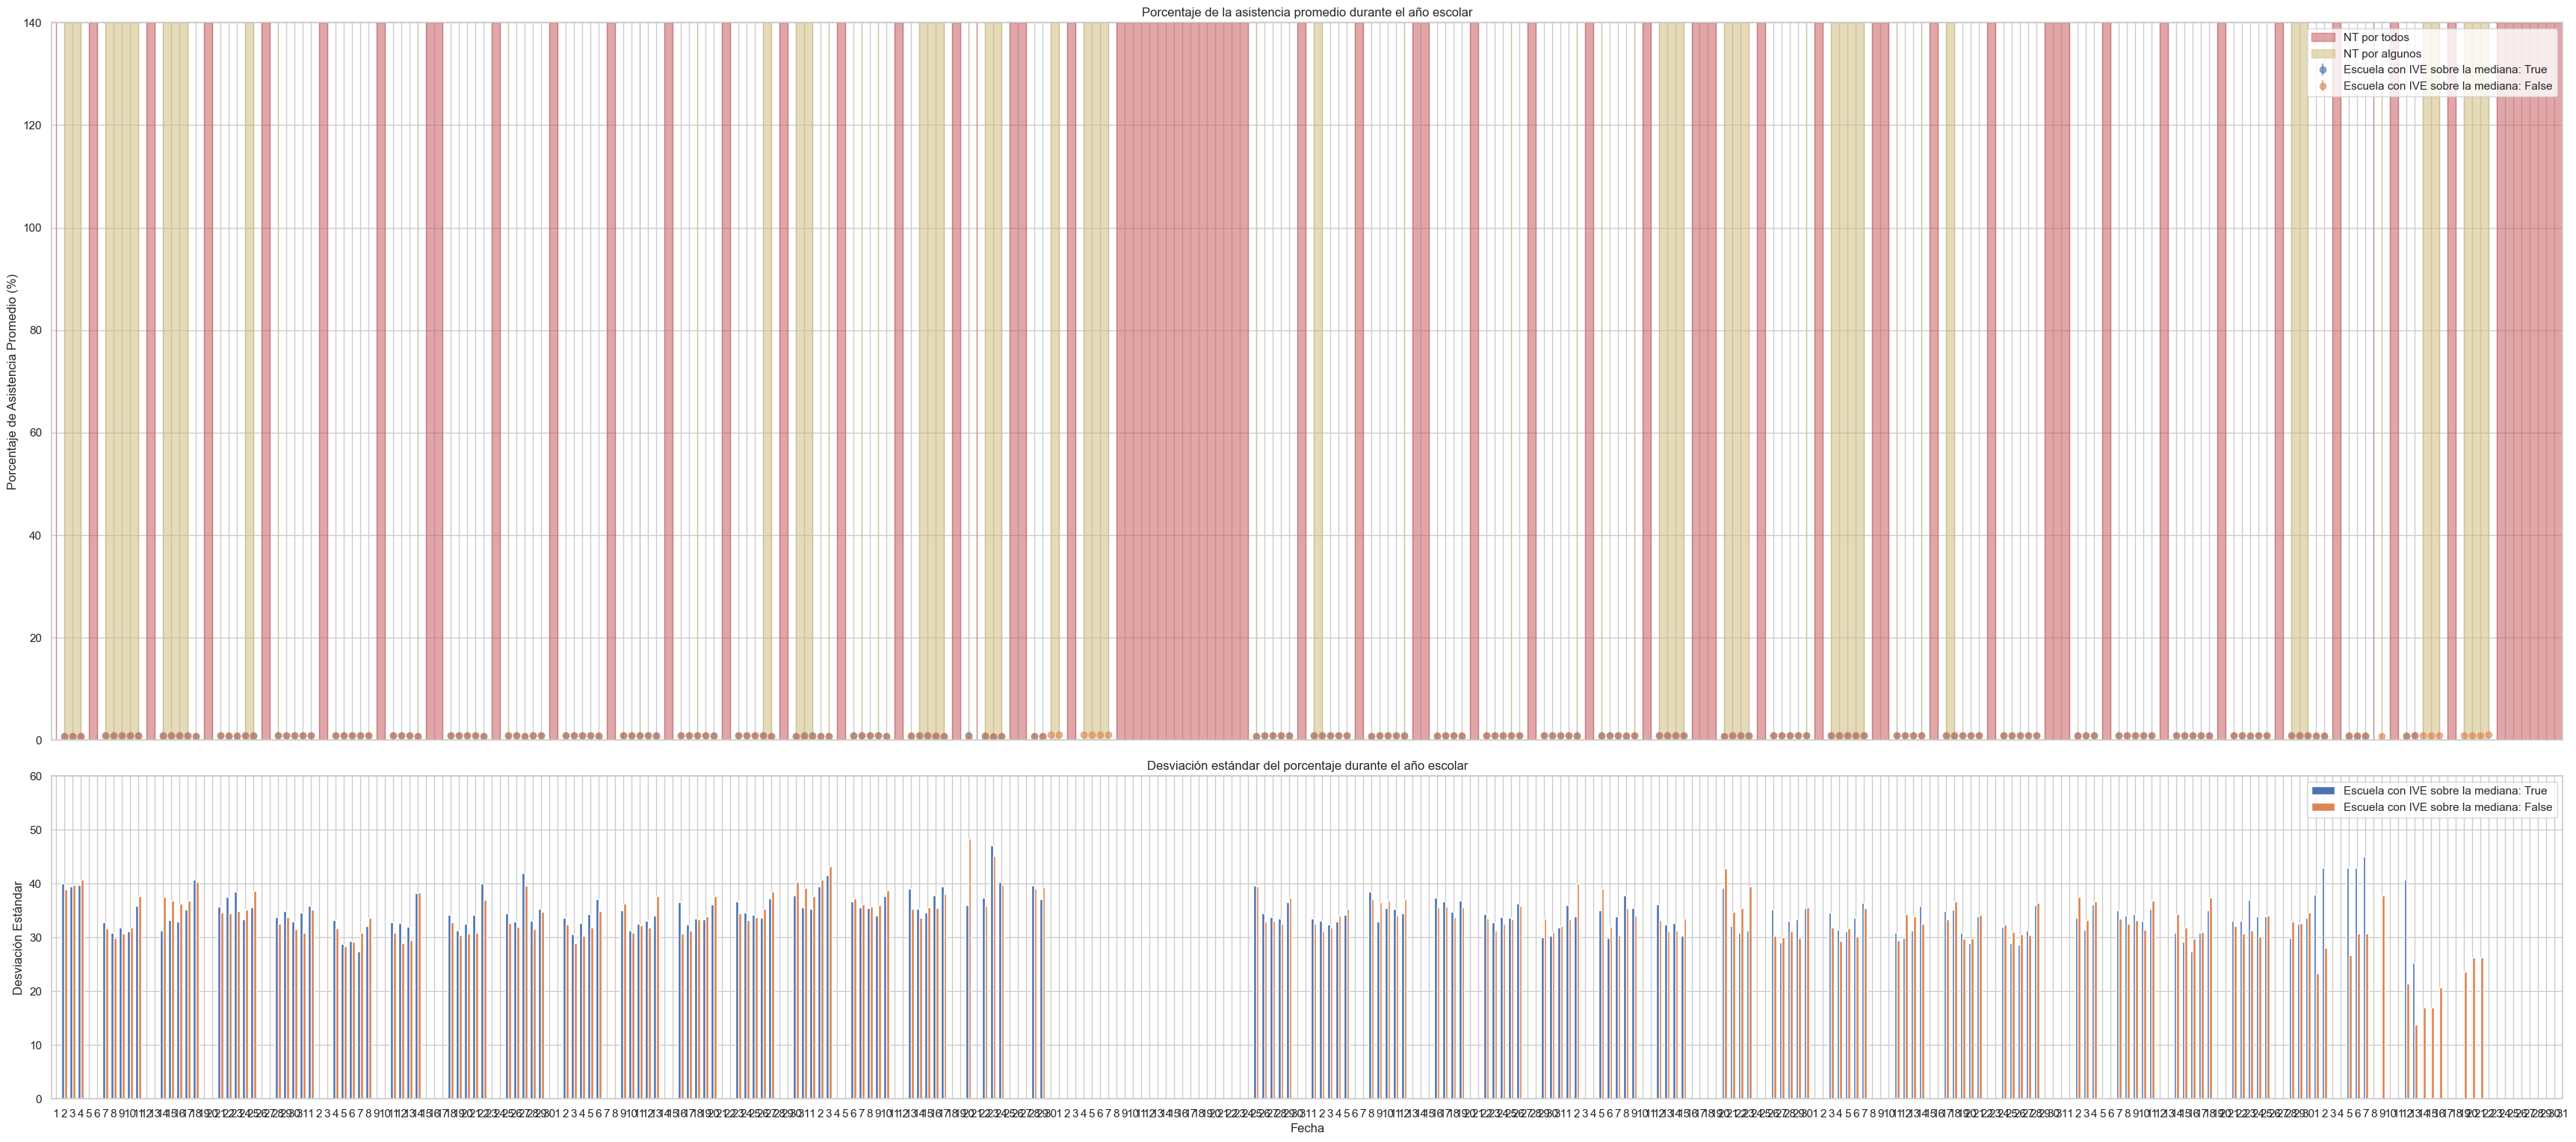

In [ ]:
top=140
## Need
x_plot = df.columns
where_filter = extract_dias_no_trabajados(df[x_plot].T)
median_ive = df_ive["IVE-SINAE BÁSICA 2022"].median()
fig, ax = plt.subplots(nrows=2,
                       figsize=(48,16),
                       sharex=True)
## Settings data
ax[0].fill_between(x=x_plot,
                y1=top,
                where=where_filter==2,
                color="r",
                alpha=0.5,
                label="NT por todos")
ax[0].fill_between(x=x_plot,
                y1=top,
                where=where_filter==1,
                color="y",
                alpha=0.5,
                label="NT por algunos")
ax[0].set_xlim(left=datetime.datetime(2022, 3, 1)- 12*datetime.timedelta(seconds=3600),right=datetime.datetime(2022, 11, 30) + 12*datetime.timedelta(seconds=3600))
ax[0].set_ylim(bottom=0, top=top)
ax[0].set_title(f"Porcentaje de la asistencia promedio durante el año escolar")
ax[0].set_ylabel("Porcentaje de Asistencia Promedio (%)")
ax[0].set_position([0.2,0.4,0.7,0.6])
ax[1].set_title(f"Desviación estándar del porcentaje durante el año escolar")
ax[1].set_ylabel("Desviación Estándar")
ax[1].set_xlabel("Fecha")
ax[1].set_ylim(bottom=0, top=60)
ax[1].set_position([0.2,0.1,0.7,0.27])
ax[0].set_xticks(ticks=x_plot,labels=list(map(lambda x: x.day,list(pd.date_range(datetime.datetime(2022,3,1),datetime.datetime(2022,12,31))))), minor=False)

for j, cat in enumerate([True,False]):
    df_aux = df.merge(df_alumnos[["rbd","genero","usuario_id"]],on="usuario_id")
    df_aux = df_aux.merge(right=df_ive,left_on="rbd",right_on="ID_RBD").assign(sobre_mediana=lambda x: x["IVE-SINAE BÁSICA 2022"]>=median_ive)    
    df_aux = df_aux[df_aux["sobre_mediana"]==cat][list(x_plot)]
    stats_for_dates = df_aux[df_aux>=0].describe().T[(df_aux[df_aux>=0].describe().T)["count"]>0]
    y_std = stats_for_dates["std"]
    y_mean = stats_for_dates["mean"]
    ax[0].errorbar(x=stats_for_dates.index,
            y=y_mean,
            yerr=1*y_std,
            fmt="o",
            alpha=.6,
            label = f"Escuela con IVE sobre la mediana: {cat}")
    ax[1].bar(x=stats_for_dates.index+(2*j-1)*datetime.timedelta(seconds=4.2*3600),
          height=y_std*100,
          width=0.35,
          label=f"Escuela con IVE sobre la mediana: {cat}")
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
## Plot
plt.show()

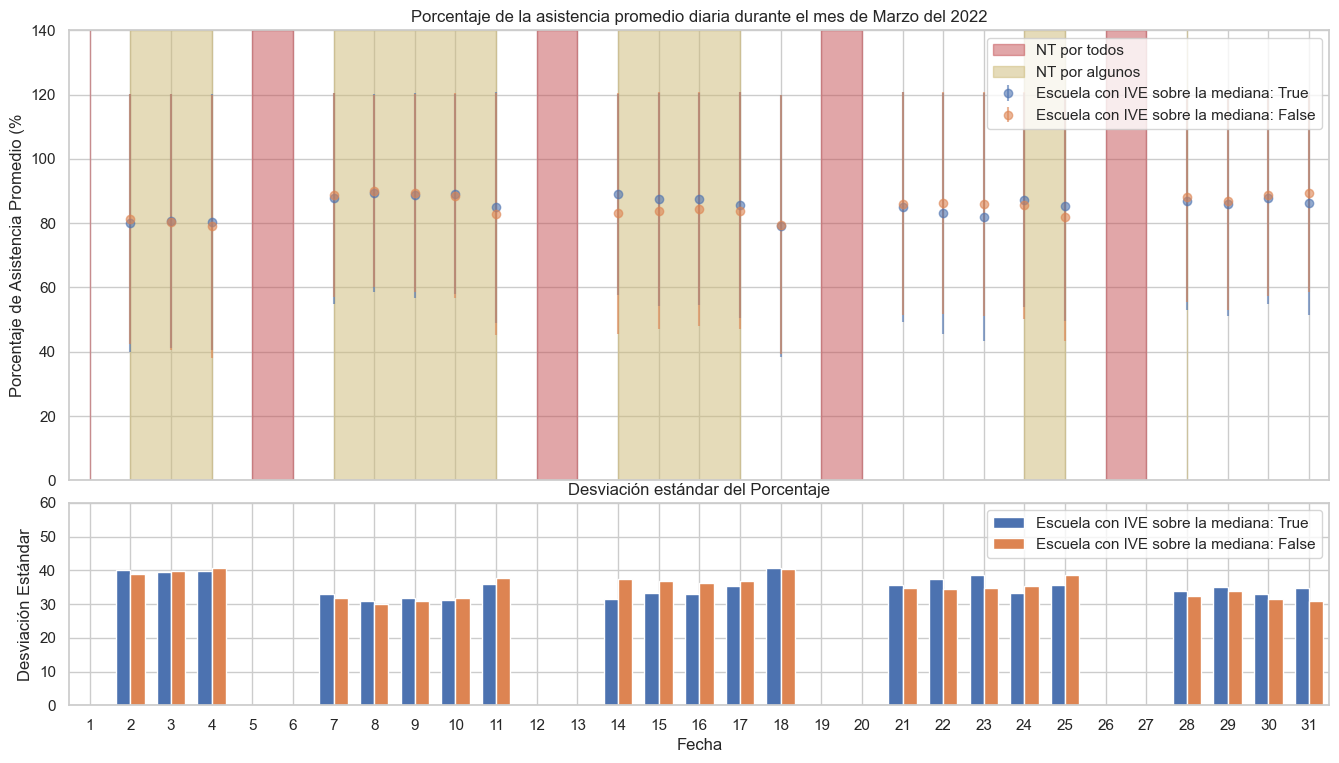

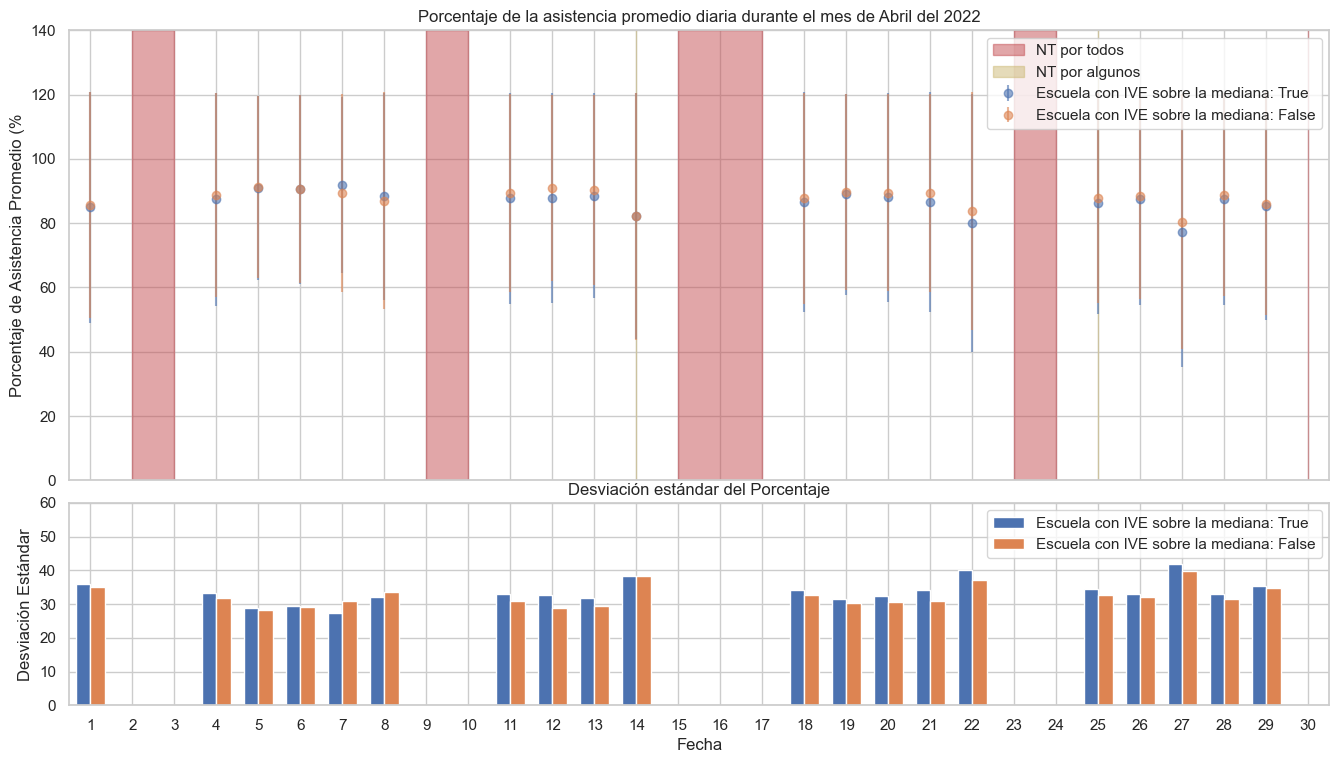

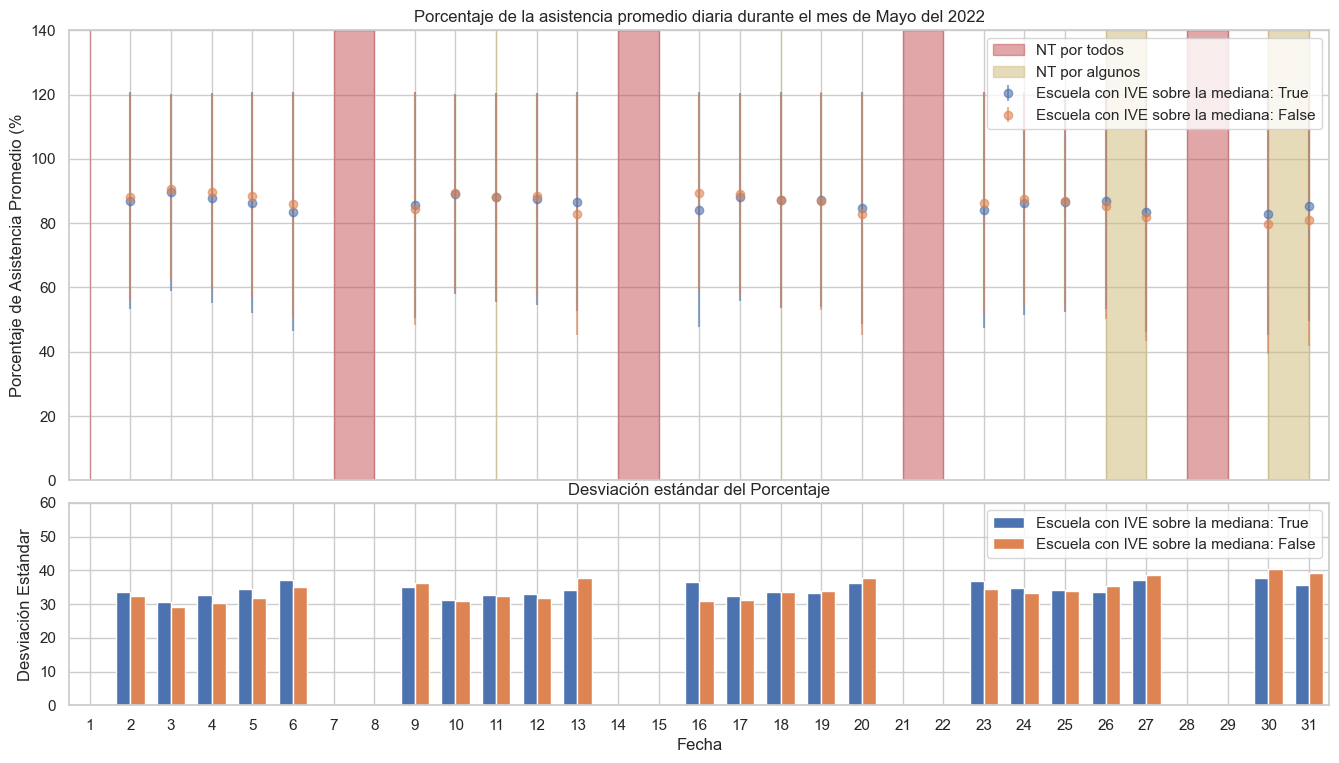

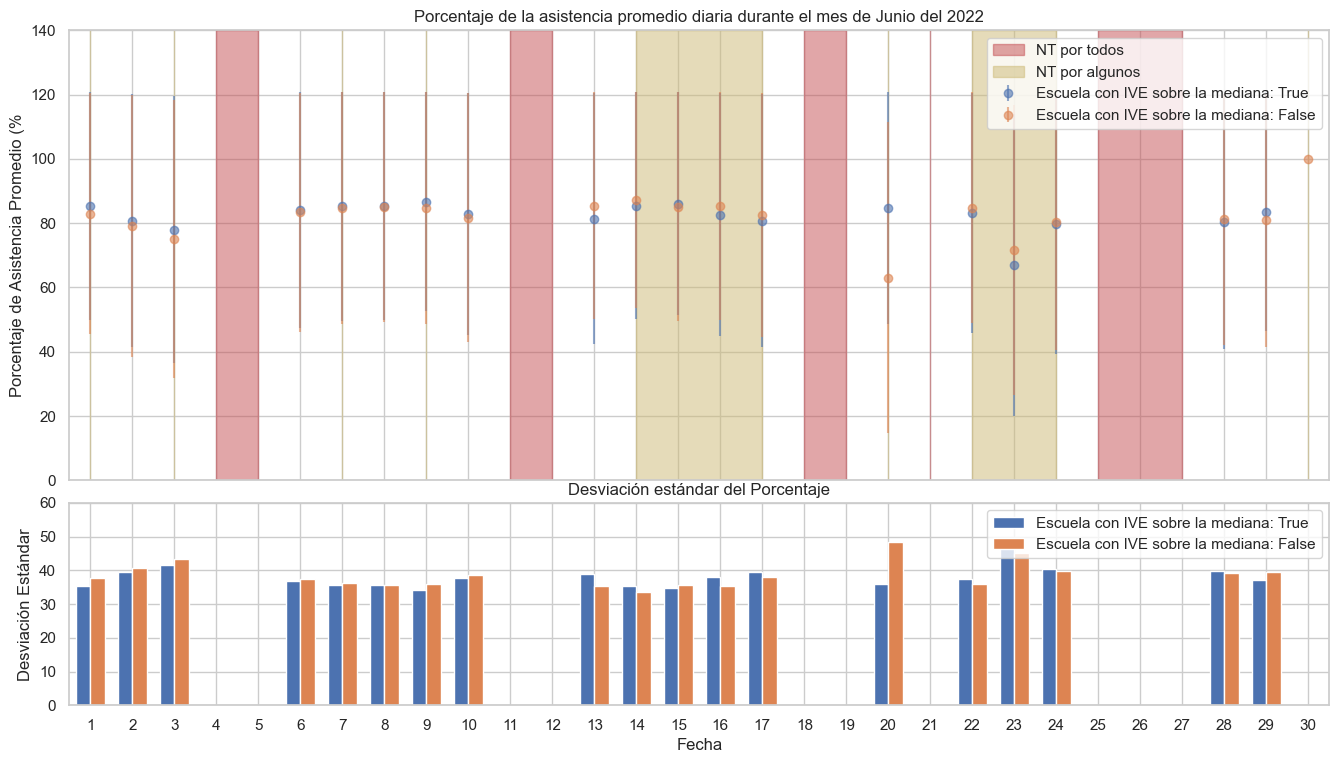

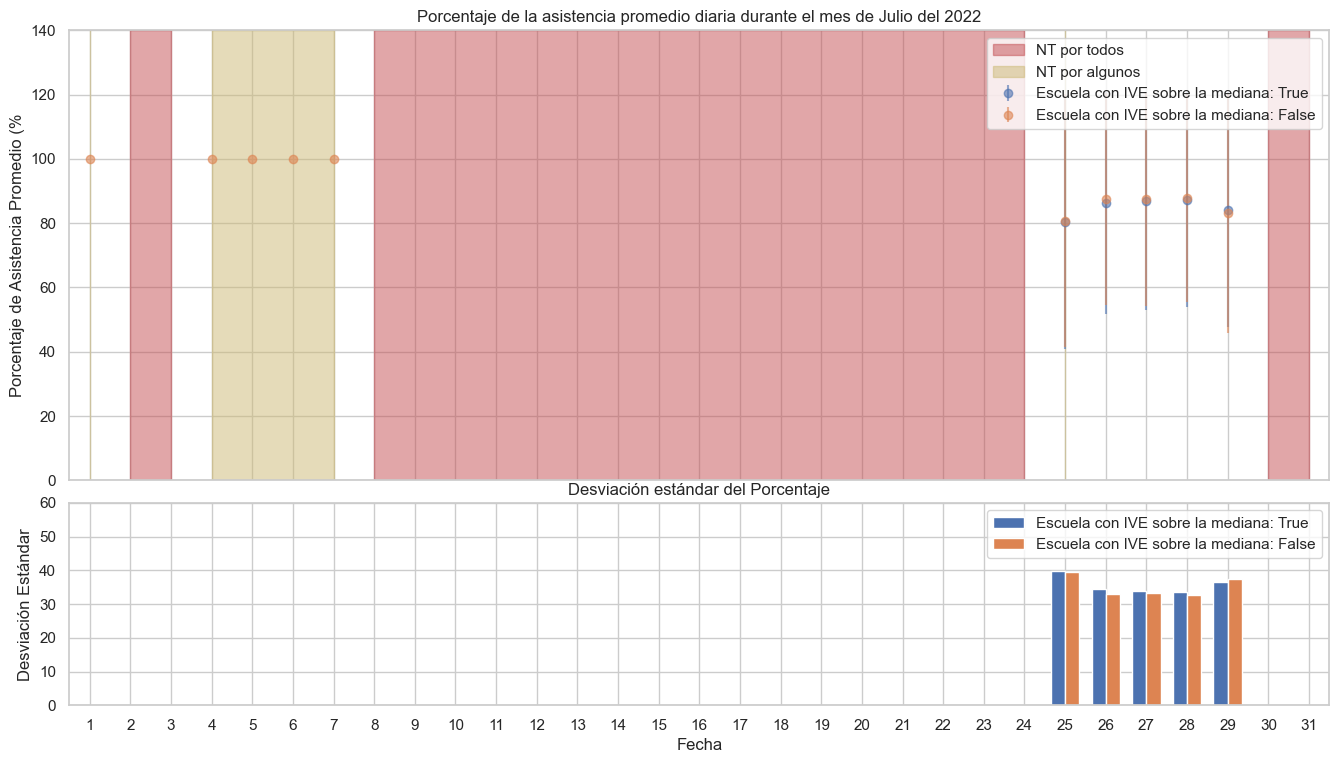

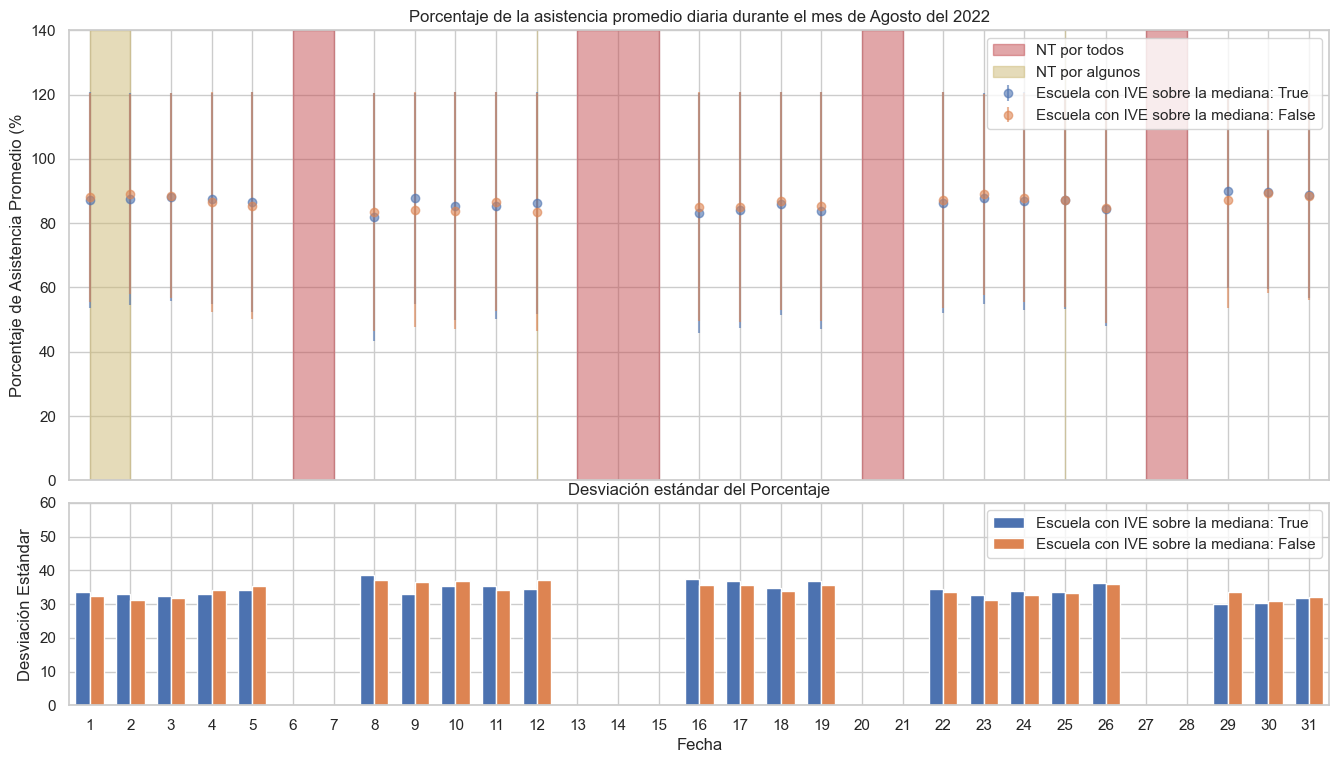

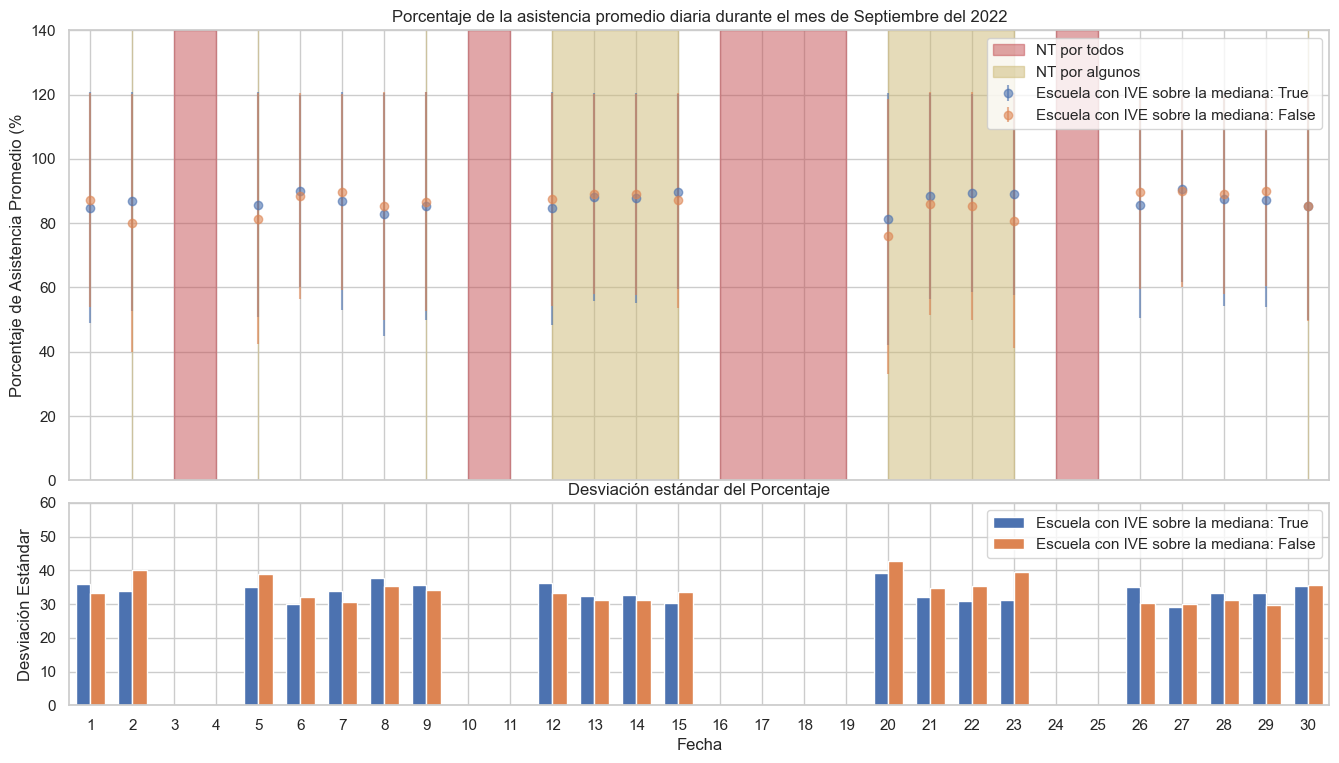

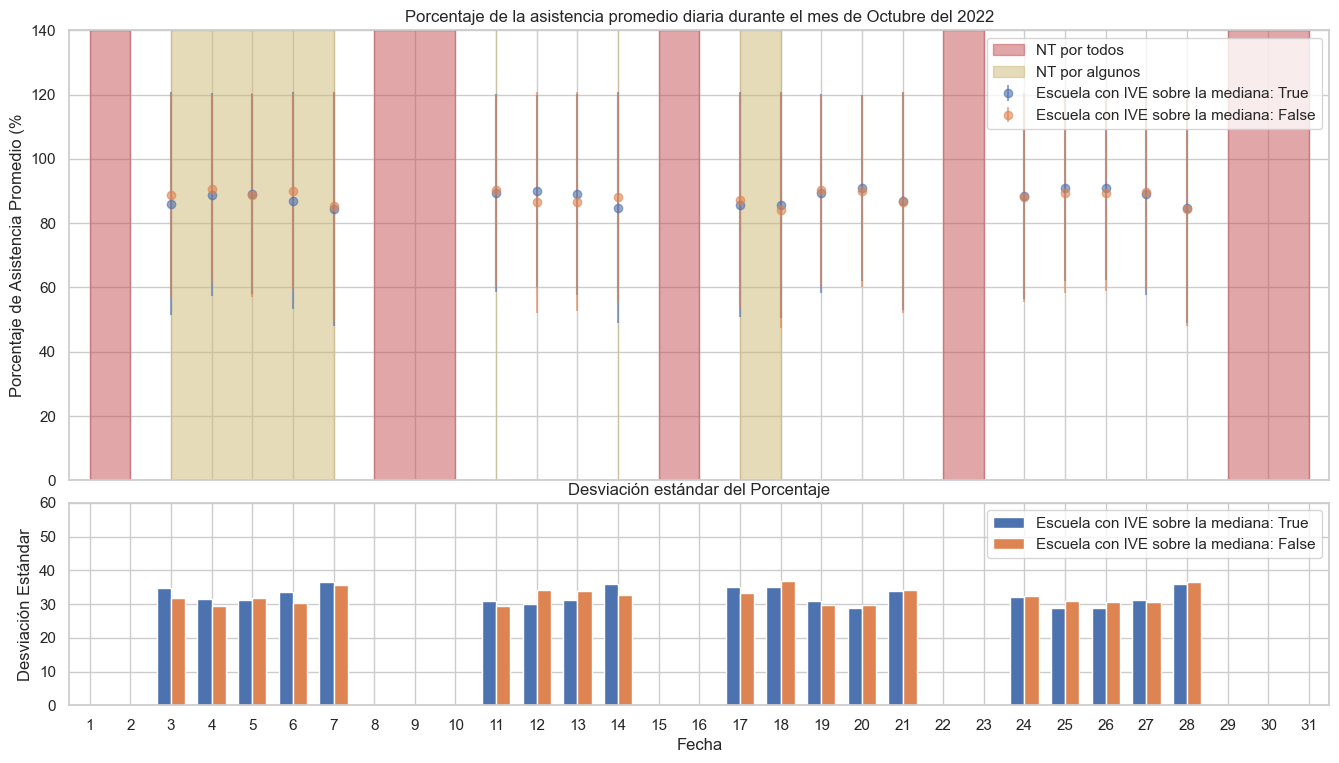

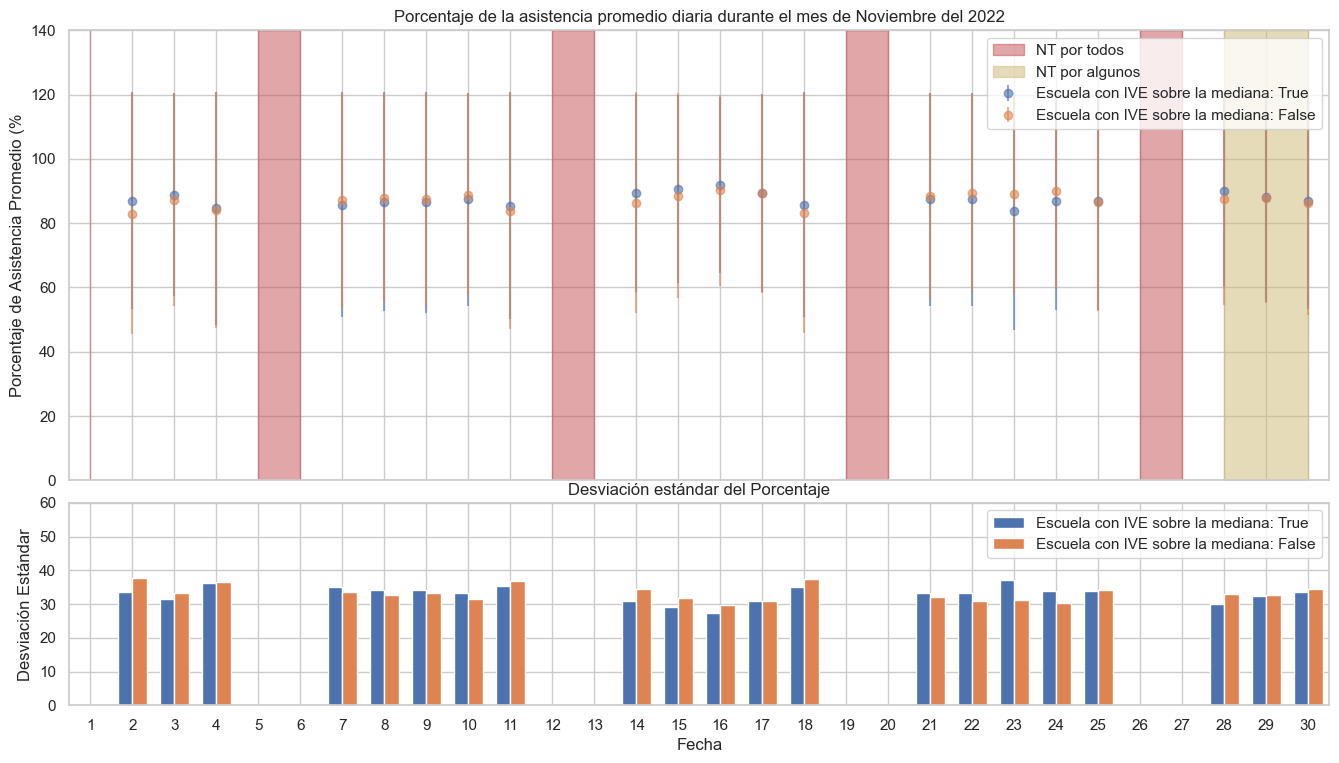

In [ ]:
top = 140

## Need
for i in range(3,12):
        x_plot = df.columns[df.columns.map(lambda x: x.month==i)]
        where_filter = extract_dias_no_trabajados(df[x_plot].T)
        median_ive = df_ive["IVE-SINAE BÁSICA 2022"].median()
        
        fig, ax = plt.subplots(nrows=2,
                               figsize=(18,7.5),
                               sharex=True)


        ## Settings data
        ax[0].fill_between(x=x_plot,
                        y1=top,
                        where=where_filter==2,
                        color="r",
                        alpha=0.5,
                        label="NT por todos")

        ax[0].fill_between(x=x_plot,
                        y1=top,
                        where=where_filter==1,
                        color="y",
                        alpha=0.5,
                        label="NT por algunos")


        ax[0].set_xlim(left=datetime.datetime(2022, i, 1)- 12*datetime.timedelta(seconds=3600),right=datetime.datetime(2022, i, PARSE_STR_MONTH_TO_DATA[PARSE_INT_TO_MONTH[i-1]][1]) + 12*datetime.timedelta(seconds=3600))
        ax[0].set_ylim(bottom=0, top=top)
        ax[0].set_title(f"Porcentaje de la asistencia promedio diaria durante el mes de {PARSE_INT_TO_MONTH[i-1]} del 2022")
        ax[0].set_ylabel("Porcentaje de Asistencia Promedio (%")
        ax[0].set_position([0.2,0.4,0.7,0.6])
        ax[0].grid(True,"both","both")
        ax[0].set_xticks(ticks=x_plot,labels=range(1,PARSE_STR_MONTH_TO_DATA[PARSE_INT_TO_MONTH[i-1]][1]+1), minor=False)

        ax[1].set_title(f"Desviación estándar del Porcentaje")
        ax[1].set_ylabel("Desviación Estándar")
        ax[1].set_xlabel("Fecha")
        ax[1].set_ylim(bottom=0, top=60)
        ax[1].set_position([0.2,0.1,0.7,0.27])
        ax[1].grid(True,"both","both")


        for j, cat in enumerate([True,False]):
            df_aux = df.merge(df_alumnos[["rbd","genero","usuario_id"]],on="usuario_id")
            df_aux = df_aux.merge(right=df_ive,left_on="rbd",right_on="ID_RBD").assign(sobre_mediana=lambda x: x["IVE-SINAE BÁSICA 2022"]>=median_ive)    
            df_aux = df_aux[df_aux["sobre_mediana"]==cat][list(x_plot)]
            stats_for_dates = df_aux[df_aux>=0].describe().T[(df_aux[df_aux>=0].describe().T)["count"]>0]
            y_std = stats_for_dates["std"]
            y_mean = stats_for_dates["mean"]

            ax[0].errorbar(x=stats_for_dates.index,
                    y=100*y_mean,
                    yerr=100*y_std,
                    fmt="o",
                    alpha=.6,
                    label = f"Escuela con IVE sobre la mediana: {cat}")

            ax[1].bar(x=stats_for_dates.index+(2*j-1)*datetime.timedelta(seconds=4.2*3600),
                  height=y_std*100,
                  width=0.35,
                  label = f"Escuela con IVE sobre la mediana: {cat}")

        ax[0].legend(loc='upper right')
        ax[1].legend(loc='upper right')
        ## Plot
        
        plt.show()

In [ ]:
top = 140

## Need
for i in range(3,12):
        x_plot = df.columns[df.columns.map(lambda x: x.month==i)]
        where_filter = extract_dias_no_trabajados(df[x_plot].T)
        median_ive = df_ive["IVE-SINAE BÁSICA 2022"].median()
        
        fig, ax = plt.subplots(nrows=2,
                               figsize=(32,16),
                               sharex=True)


        ## Settings data
        ax[0].fill_between(x=x_plot,
                        y1=top,
                        where=where_filter==2,
                        color="r",
                        alpha=0.5,
                        label="NT por todos")

        ax[0].fill_between(x=x_plot,
                        y1=top,
                        where=where_filter==1,
                        color="y",
                        alpha=0.5,
                        label="NT por algunos")


        ax[0].set_xlim(left=datetime.datetime(2022, i, 1)- 12*datetime.timedelta(seconds=3600),right=datetime.datetime(2022, i, PARSE_STR_MONTH_TO_DATA[PARSE_INT_TO_MONTH[i-1]][1]) + 12*datetime.timedelta(seconds=3600))
        ax[0].set_ylim(bottom=0, top=top)
        ax[0].set_title(f"Asistencia promedio durante el mes de {PARSE_INT_TO_MONTH[i-1]}")
        ax[0].set_ylabel("Porcentaje Asistencia Promedio (%)")
        ax[0].set_position([0.2,0.4,0.7,0.6])
        ax[0].set_xticks(ticks=x_plot,labels=range(1,PARSE_STR_MONTH_TO_DATA[PARSE_INT_TO_MONTH[i-1]][1]+1), minor=False)

        ax[1].set_title(f"Desviación estándar del porcentaje durante el mes de {PARSE_INT_TO_MONTH[i-1]}")
        ax[1].set_ylabel("Desviación Estándar")
        ax[1].set_xlabel("Fecha")
        ax[1].set_ylim(bottom=0, top=60)
        ax[1].set_position([0.2,0.1,0.7,0.27])



        for k, cat1 in enumerate(["M","F"]):   
            for j, cat2 in enumerate([True,False]):
                df_aux = df.merge(df_alumnos[["rbd","genero","usuario_id"]],on="usuario_id")
                df_aux = df_aux[df_aux["genero"]==cat1] 
                df_aux = df_aux.merge(right=df_ive[["IVE-SINAE BÁSICA 2022","ID_RBD"]],left_on="rbd",right_on="ID_RBD").assign(sobre_mediana=lambda x: x["IVE-SINAE BÁSICA 2022"]>=median_ive)
                df_aux = df_aux[df_aux["sobre_mediana"]==cat2][list(x_plot)]
                stats_for_dates = df_aux[df_aux>=0].describe().T[(df_aux[df_aux>=0].describe().T)["count"]>0]
                y_std = stats_for_dates["std"]
                y_mean = stats_for_dates["mean"]

                ax[0].errorbar(x=stats_for_dates.index,
                        y=y_mean*100,
                        yerr=100*y_std,
                        fmt="o",
                        alpha=.7,
                        label = f"Escuela con IVE sobre la mediana: {cat2}\n Genero: {cat1}")

                ax[1].bar(x=stats_for_dates.index+(0.5*(j+2*k)-1)*datetime.timedelta(seconds=8*3600),
                      height=y_std*100,
                      width=0.15,
                      label = f"Escuela con IVE sobre la mediana: {cat2}\n Genero: {cat1}")

        ax[0].legend(loc='lower right')
        ax[1].legend(loc='upper right')
        ## Plot

        plt.show()

AttributeError: 'str' object has no attribute 'month'